# História das Olimpíadas - Parte 2

Você recentemente trabalhou (ou está trabalhando) em uma análise de dados históricos dos jogos olímpicos utilizando o Pandas para auxiliá-lo.

Desde que você iniciou seus trabalhos nesse projeto, novas ferramentas bastante poderosas foram ensinadas! O seu papel agora será utilizar essas novas ferramentas para gerar algumas visualizações que tornarão certas informações muito mais claras.

Utilize qualquer uma das bibliotecas estudadas (```matplotlib```, ```seaborn``` e ```plotly```) para realizar as atividades propostas. Não há problema em usar apenas uma para realizar todas as atividades, nem em utilizar cada uma delas em uma atividade diferente - siga suas preferências pessoais!

Utilize os (muitos) parâmetros permitidos por cada função e/ou atributos dos objetos fornecidos pelas bibliotecas para criar uma identidade visual coesa para ser utilizada em todo o projeto. Use títulos, legendas e rótulos nos eixos para deixar os gráficos verdadeiramente informativos. E não se esqueça que a simples escolha das cores a serem utilizadas pode tornar os gráficos ainda mais interessantes!

Você utilizará o mesmo dataset fornecido no projeto anterior. Não há problemas em reaproveitar códigos do projeto anterior para economizar tempo e focar seus esforços na geração dos gráficos.

Para começar, importe o Pandas e carregue o arquivo ```athlete_events.csv``` fornecido no projeto anterior.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px      # utilizado para chamar funções
import plotly.graph_objects as go # utilizado para criar objetos

%matplotlib inline
sns.set()

# Carregando o dataset e verificando uma amostra
df_athlete_events = pd.read_csv('athlete_events.csv')
df_athlete_events.sample(10)

ID                             Name Sex   Age  Height  Weight  \
139491   70054               Harry Erik Lindbck   M  25.0     NaN     NaN   
200270  100573                   Antoine Richer   M  30.0   187.0    89.0   
235747  118200              Patrick Tambw Ngoie   M  37.0   182.0    68.0   
265305  132771                Hayk Yeghiazaryan   M  24.0     NaN    70.0   
89727    45469                    Han Na-Gyeong   F  19.0   160.0    53.0   
56970    29183   Sergey Nikolayevich Dolidovich   M  36.0   175.0    68.0   
157913   79270  Ruslan Volodymyrovych Mezentsev   M  23.0   168.0    60.0   
23120    12157                     Johann Blank   M  24.0     NaN     NaN   
206739  103764          Anton Petrovich Ryakhov   M  20.0   191.0    96.0   
103040   52132                Paul Andrew Ingle   M  20.0   162.0    51.0   

                 Team  NOC        Games  Year  Season         City  \
139491         Sweden  SWE  1952 Summer  1952  Summer     Helsinki   
200270         France  FRA  1992 Winter  1992  Winter  Albertville   
235747         France  FRA  2012 Summer  2012  Summer       London   
265305        Armenia  ARM  1996 Summer  1996  Summer      Atlanta   
89727     South Korea  KOR  2012 Summer  2012  Summer       London   
56970         Belarus  BLR  2010 Winter  2010  Winter    Vancouver   
157913        Ukraine  UKR  2004 Summer  2004  Summer       Athina   
23120         Germany  GER  1928 Summer  1928  Summer    Amsterdam   
206739     Uzbekistan  UZB  2000 Summer  2000  Summer       Sydney   
103040  Great Britain  GBR  1992 Summer  1992  Summer    Barcelona   

                       Sport                                           Event  \
139491              Canoeing  Canoeing Men's Canadian Doubles, 10,000 metres   
200270            Ice Hockey                     Ice Hockey Men's Ice Hockey   
235747             Athletics                        Athletics Men's Marathon   
265305         Weightlifting                 Weightlifting Men's Lightweight   
89727               Swimming           Swimming Women's 800 metres Freestyle   
56970   Cross Country Skiing        Cross Country Skiing Men's 50 kilometres   
157913            Gymnastics          Gymnastics Men's Individual All-Around   
23120             Water Polo                     Water Polo Men's Water Polo   
206739              Canoeing      Canoeing Men's Kayak Singles, 1,000 metres   
103040                Boxing                          Boxing Men's Flyweight   

       Medal  
139491   NaN  
200270   NaN  
235747   NaN  
265305   NaN  
89727    NaN  
56970    NaN  
157913   NaN  
23120   Gold  
206739   NaN  
103040   NaN

## 1. O Brasil nas Olimpíadas

Vamos começar filtrando novamente os dados que iremos trabalhar. Crie um DataFrame contendo apenas informações sobre atletas **medalhistas** brasileiros.

In [2]:
# Criando um DF apenas com atletas brasileiros, utilizando ['NOC'] == 'BRA'
df_atletas_bra = df_athlete_events[df_athlete_events['NOC'] == 'BRA']
df_atletas_bra.info()
df_atletas_bra.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3848 entries, 665 to 270789
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3848 non-null   int64  
 1   Name    3848 non-null   object 
 2   Sex     3848 non-null   object 
 3   Age     3788 non-null   float64
 4   Height  3365 non-null   float64
 5   Weight  3188 non-null   float64
 6   Team    3848 non-null   object 
 7   NOC     3848 non-null   object 
 8   Games   3848 non-null   object 
 9   Year    3848 non-null   int64  
 10  Season  3848 non-null   object 
 11  City    3848 non-null   object 
 12  Sport   3848 non-null   object 
 13  Event   3848 non-null   object 
 14  Medal   475 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 481.0+ KB


ID                        Name Sex   Age  Height  Weight    Team  NOC  \
665   386             Alexandre Abeid   M  22.0   194.0    92.0  Brazil  BRA   
666   386             Alexandre Abeid   M  26.0   194.0    92.0  Brazil  BRA   
668   388  Abel Carlos da Silva Braga   M  19.0   190.0    73.0  Brazil  BRA   
781   451         Diana Monteiro Abla   F  21.0   175.0    75.0  Brazil  BRA   
1005  565        Glauclio Serro Abreu   M  26.0   185.0    75.0  Brazil  BRA   

            Games  Year  Season            City       Sport  \
665   1972 Summer  1972  Summer          Munich  Volleyball   
666   1976 Summer  1976  Summer        Montreal  Volleyball   
668   1972 Summer  1972  Summer          Munich    Football   
781   2016 Summer  2016  Summer  Rio de Janeiro  Water Polo   
1005  2004 Summer  2004  Summer          Athina      Boxing   

                              Event Medal  
665     Volleyball Men's Volleyball   NaN  
666     Volleyball Men's Volleyball   NaN  
668         Football Men's Football   NaN  
781   Water Polo Women's Water Polo   NaN  
1005      Boxing Men's Middleweight   NaN

In [3]:
# Criando um DF apenas com medalhistas brasileiros ('NOC' == 'BRA')
df_medal_bra = df_atletas_bra[~df_atletas_bra['Medal'].isna()]
df_medal_bra.info()
df_medal_bra.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 1651 to 268247
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      475 non-null    int64  
 1   Name    475 non-null    object 
 2   Sex     475 non-null    object 
 3   Age     474 non-null    float64
 4   Height  457 non-null    float64
 5   Weight  447 non-null    float64
 6   Team    475 non-null    object 
 7   NOC     475 non-null    object 
 8   Games   475 non-null    object 
 9   Year    475 non-null    int64  
 10  Season  475 non-null    object 
 11  City    475 non-null    object 
 12  Sport   475 non-null    object 
 13  Event   475 non-null    object 
 14  Medal   475 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 59.4+ KB


ID                                 Name Sex   Age  Height  Weight  \
1651   918                  Ademir Roque Kaefer   M  24.0   179.0    74.0   
1652   918                  Ademir Roque Kaefer   M  28.0   179.0    74.0   
1668   925  Adenzia Aparecida Ferreira da Silva   F  25.0   187.0    65.0   
1733   966                         Daniel Adler   M  26.0   180.0    72.0   
1856  1020         Adriana Aparecida dos Santos   F  25.0   180.0    61.0   

        Team  NOC        Games  Year  Season         City       Sport  \
1651  Brazil  BRA  1984 Summer  1984  Summer  Los Angeles    Football   
1652  Brazil  BRA  1988 Summer  1988  Summer        Seoul    Football   
1668  Brazil  BRA  2012 Summer  2012  Summer       London  Volleyball   
1733  Brazil  BRA  1984 Summer  1984  Summer  Los Angeles     Sailing   
1856  Brazil  BRA  1996 Summer  1996  Summer      Atlanta  Basketball   

                                    Event   Medal  
1651              Football Men's Football  Silver  
1652              Football Men's Football  Silver  
1668        Volleyball Women's Volleyball    Gold  
1733  Sailing Mixed Three Person Keelboat  Silver  
1856        Basketball Women's Basketball  Silver

Vamos caracterizar fisicamente nossos medalhistas, verificando se há alguma correlação entre o desempenho em certos esportes e o tipo físico dos atletas. 

Gere um gráfico de barras contendo os diferentes esportes no eixo X e a altura dos atletas no eixo Y. Utilize barras lado-a-lado para separar atletas do sexo masculino e feminino.

In [4]:
# Lista de todos os esportes em que o Brasil ganhou alguma medalha -> ('NOC' == 'BRA')
df_medal_bra['Sport'].unique()

array(['Football', 'Volleyball', 'Sailing', 'Basketball',
       'Beach Volleyball', 'Boxing', 'Shooting', 'Swimming', 'Athletics',
       'Judo', 'Equestrianism', 'Taekwondo', 'Gymnastics',
       'Modern Pentathlon', 'Canoeing'], dtype=object)

In [5]:
# Altura média dos medalhistas brasileiros por esporte e gênero ('NOC' == 'BRA')
df_atlet_alt_gen = df_medal_bra.groupby(by=['Sport', 'Sex'])['Height'].mean().reset_index()
df_atlet_alt_gen

Sport Sex      Height
0           Athletics   F  173.000000
1           Athletics   M  181.320000
2          Basketball   F  183.375000
3          Basketball   M  187.592593
4    Beach Volleyball   F  175.000000
5    Beach Volleyball   M  195.583333
6              Boxing   F  167.000000
7              Boxing   M  170.750000
8            Canoeing   M  175.000000
9       Equestrianism   M  179.666667
10           Football   F  166.971429
11           Football   M  178.989691
12         Gymnastics   M  162.750000
13               Judo   F  168.200000
14               Judo   M  179.312500
15  Modern Pentathlon   F  166.000000
16            Sailing   F  170.500000
17            Sailing   M  183.066667
18           Shooting   M  175.000000
19           Swimming   F  165.000000
20           Swimming   M  190.444444
21          Taekwondo   F  178.000000
22          Taekwondo   M  190.000000
23         Volleyball   F  183.437500
24         Volleyball   M  195.361111

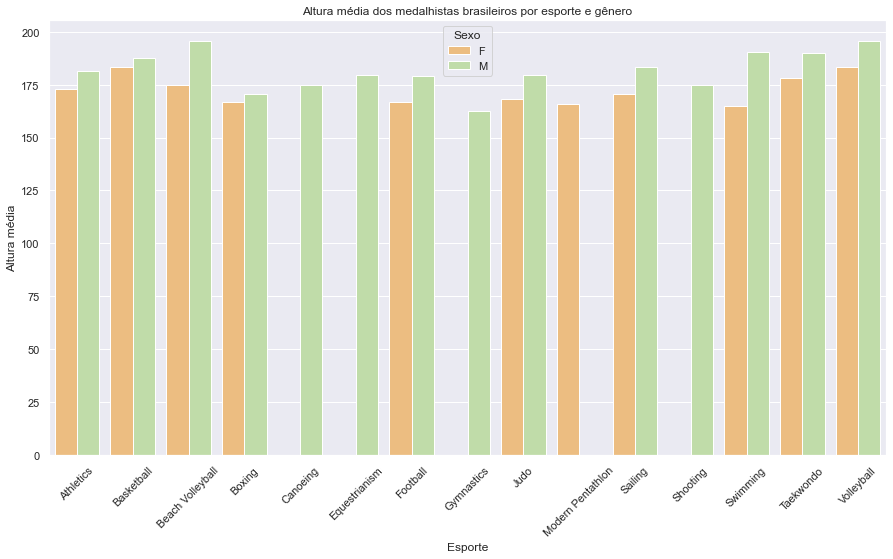

In [6]:
# Gráfico de barras (esporte x altura) lado a lado (feminino x masculino)
plt.figure(figsize=(15, 8));
sns.barplot(data=df_atlet_alt_gen, x='Sport', y='Height', hue='Sex', palette='Spectral');
plt.title('Altura média dos medalhistas brasileiros por esporte e gênero');
plt.xlabel('Esporte');
plt.ylabel('Altura média');
plt.xticks(rotation=45);
plt.legend(loc='upper center', title="Sexo");

In [7]:
# Altura média dos medalhistas brasileiros por esporte ('NOC' == 'BRA')
df_medal_alt = df_medal_bra.groupby('Sport')['Height'].mean()
df_medal_alt

Sport
Athletics            181.000000
Basketball           185.607843
Beach Volleyball     184.880000
Boxing               170.000000
Canoeing             175.000000
Equestrianism        179.666667
Football             175.803030
Gymnastics           162.750000
Judo                 176.666667
Modern Pentathlon    166.000000
Sailing              181.588235
Shooting             175.000000
Swimming             189.105263
Taekwondo            184.000000
Volleyball           190.591667
Name: Height, dtype: float64

Agora gere um gráfico semelhante ilustrando o peso dos atletas.

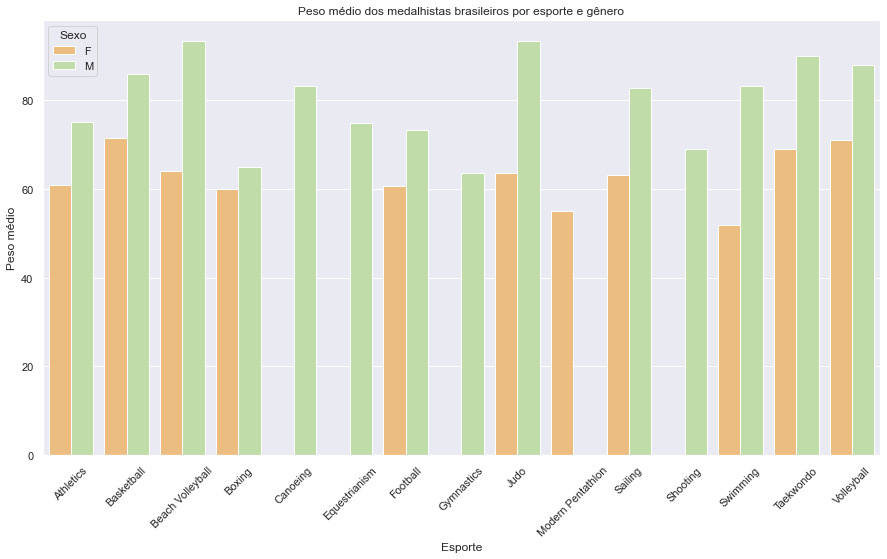

In [8]:
# Peso médio dos medalhistas brasileiros por esporte e gênero ('NOC' == 'BRA')
df_atlet_peso_gen = df_medal_bra.groupby(by=['Sport', 'Sex'])['Weight'].mean().reset_index()

# Gráfico de barras (esporte x peso) lado a lado (feminino x masculino)
plt.figure(figsize=(15, 8));
sns.barplot(data=df_atlet_peso_gen, x='Sport', y='Weight', hue='Sex', palette='Spectral');
plt.title('Peso médio dos medalhistas brasileiros por esporte e gênero');
plt.xlabel('Esporte');
plt.ylabel('Peso médio');
plt.xticks(rotation=45);
plt.legend(title="Sexo");

Vamos analisar agora as medalhas que nossos atletas trouxeram para casa.

Encontre os maiores medalhistas brasileiros em **total de medalhas**. Em seguida, faça um gráfico de barras empilhadas. No eixo X coloque o nome dos atletas, e no eixo Y coloque o número de medalhas. Utilize as barras empilhadas para mostrar, respectivamente, as medalhas de bronze, prata e ouro de cada atleta.

In [9]:
# Os maiores medalhistas brasileiros foram: Robert Scheidt e Torben Schmidt Grael,
# cada um com 5 medalhas no total.

# Em seguida, temos: Sérgio Dutra dos Santos ("Escadinha") e Gustavo Frana Borges,
# cada um com 4 medalhas no total.

# Total de medalhas por atleta e tipo de medalha
total_medal_tipo_atlet_bra = df_medal_bra.groupby('Name')['Medal'].value_counts().reset_index(name='Total por medalha')

# Total de medalhas por atleta
total_medal_atlet_bra = total_medal_tipo_atlet_bra.groupby('Name')['Total por medalha'].sum().reset_index(name='Total de medalhas')

# Total de medalhas de ouro, prata, bronze e total por atleta
quadro_medal_atlet_bra = pd.merge(total_medal_tipo_atlet_bra, total_medal_atlet_bra, on='Name')

# Os quatro maiores medalhistas brasileiros
top_4 = quadro_medal_atlet_bra.sort_values(['Total de medalhas', 'Name'], ascending=[False, True]).head(10)
top_4.set_index(['Name', 'Medal'], inplace=True)
top_4 = top_4.unstack(level=1)
top_4.drop('Total de medalhas', axis=1, inplace=True)
top_4.columns = ['Bronze', 'Gold', 'Silver']

top_4 = top_4[['Bronze', 'Silver', 'Gold']]
top_4

Bronze  Silver  Gold
Name                                                    
Gustavo Frana Borges                   2.0     2.0   NaN
Robert Scheidt                         1.0     2.0   2.0
Srgio "Escadinha" Dutra dos Santos     NaN     2.0   2.0
Torben Schmidt Grael                   2.0     1.0   2.0

In [10]:
# # Gráfico de barras empilhadas
# plt.rcParams["figure.figsize"] = (8,6)
# top_4.plot(kind='bar', stacked=True);
# plt.title('Maiores medalhistas brasileiros');
# plt.xlabel('Nome');
# plt.ylabel('Número de medalhas');
# plt.legend(title='Medalha', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

In [11]:
# Gráfico de barras empilhadas com plotly
top_4_2 = top_4.reset_index()

fig_top_4_2 = px.bar(top_4_2, x='Name', y=['Bronze', 'Silver', 'Gold'], color_discrete_sequence=['#CD7F32', 'silver', 'gold'], 
       title='Maiores medalhistas brasileiros', 
       labels=dict(Name='Nome', value='Número de medalhas', variable='Medalha'))
fig_top_4_2.update_layout(width=800, height=600, bargap=0.5)

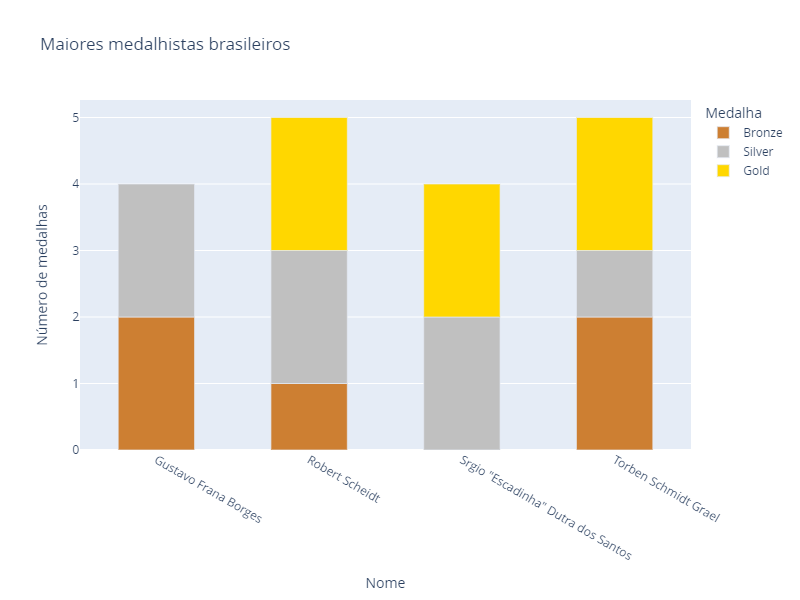

Agora gere o mesmo gráfico de barras empilhadas substituindo os nomes dos atletas pelo nome de todos os esportes onde o Brasil já ganhou medalhas.

**DICA:** tome muito cuidado nessa análise: cada **evento esportivo** rende 1 medalha. Por exemplo, quando a equipe de futebol vence, isso é considerado 1 medalha, mesmo tendo cerca de 20 atletas medalhistas na equipe. 

In [12]:
# Total de medalhas por esporte e tipo de medalha
total_medal_tipo_sport_bra = df_medal_bra.groupby(['Sport', 'Year', 'Medal'])['Event'].value_counts().reset_index(name='Qtde atletas')
total_medal_tipo_sport_bra = total_medal_tipo_sport_bra.groupby(['Sport', 'Year', 'Medal'])['Event'].count().reset_index()
total_medal_tipo_sport_bra = total_medal_tipo_sport_bra.groupby(['Sport', 'Medal'])['Event'].sum().reset_index(name='Total por medalha')
total_medal_tipo_sport_bra.set_index(['Sport', 'Medal'], inplace=True)
total_medal_tipo_sport_bra = total_medal_tipo_sport_bra.unstack(level=1)
total_medal_tipo_sport_bra.columns = ['Bronze', 'Gold', 'Silver']
total_medal_tipo_sport_bra = total_medal_tipo_sport_bra[['Bronze', 'Silver', 'Gold']]
total_medal_tipo_sport_bra

Bronze  Silver  Gold
Sport                                  
Athletics             8.0     3.0   5.0
Basketball            4.0     1.0   NaN
Beach Volleyball      3.0     7.0   3.0
Boxing                3.0     1.0   1.0
Canoeing              1.0     2.0   NaN
Equestrianism         2.0     NaN   1.0
Football              2.0     5.0   1.0
Gymnastics            1.0     2.0   1.0
Judo                 15.0     3.0   4.0
Modern Pentathlon     1.0     NaN   NaN
Sailing               8.0     3.0   7.0
Shooting              1.0     2.0   1.0
Swimming              9.0     4.0   1.0
Taekwondo             2.0     NaN   NaN
Volleyball            2.0     3.0   5.0

In [13]:
# # Gráfico de barras empilhadas
# plt.rcParams["figure.figsize"] = (12,10)
# total_medal_tipo_sport_bra.plot(kind='bar', stacked=True);
# plt.title('Esportes em que o Brasil já ganhou medalha');
# plt.xlabel('Esporte');
# plt.ylabel('Número de medalhas');
# plt.legend(title='Medalha', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

In [14]:
# Gráfico de barras empilhadas com plotly
total_medal_tipo_sport_bra_2 = total_medal_tipo_sport_bra.reset_index()

fig_medal_tipo_sport = px.bar(total_medal_tipo_sport_bra_2, x='Sport', y=['Bronze', 'Silver', 'Gold'], 
             color_discrete_sequence=['#CD7F32', 'silver', 'gold'], 
       title='Esportes em que o Brasil já ganhou medalha', 
       labels=dict(Sport='Esporte', value='Número de medalhas', variable='Medalha'))
fig_medal_tipo_sport.update_layout(width=900, height=700, bargap=0.5)

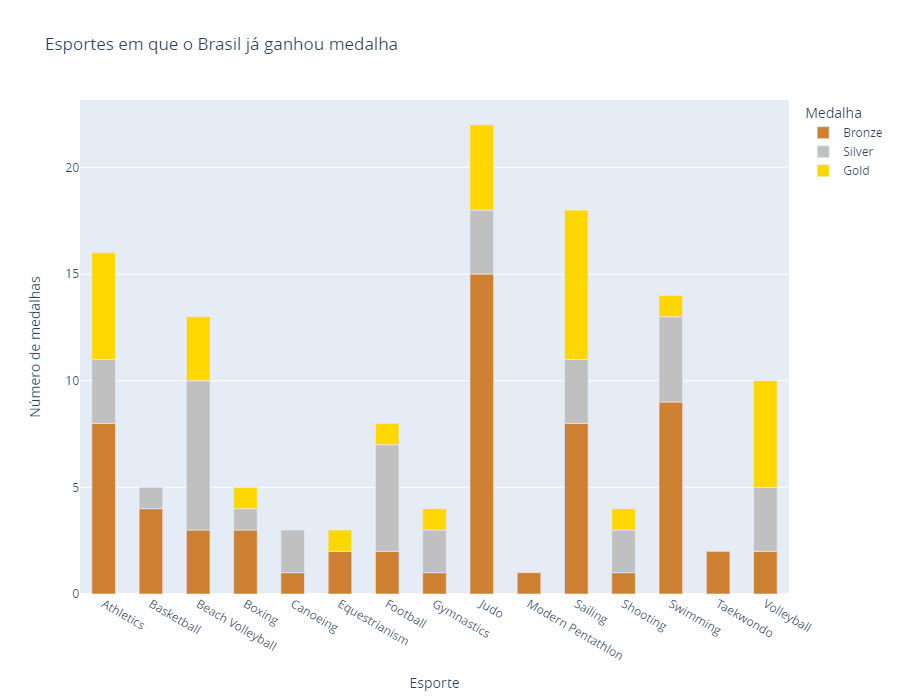

Mais um gráfico de barras empilhadas: agora mostre os **eventos esportivos** que renderam medalhas para o Brasil.

Lembrando: cada "categoria" dentro de um esporte é considerado um evento. Por exemplo, dentro de "atletismo", temos uma competição de 100m masculina, uma de 100m feminino, um revezamento 4 x 100m masculino, um revezamento 4 x 100m feminino, uma competição de 400m masculino, uma de 400m feminino, uma maratona masculina, uma maratona feminina, e assim sucessivamente.

In [15]:
# Total de medalhas por evento e tipo de medalha
total_medal_tipo_event_bra = df_medal_bra.groupby(['Year', 'Medal'])['Event'].value_counts().reset_index(name='Qtde atletas')
total_medal_tipo_event_bra = pd.get_dummies(total_medal_tipo_event_bra,columns=['Medal'])
total_medal_tipo_event_bra.drop(['Qtde atletas', 'Year'], axis=1, inplace=True)
total_medal_tipo_event_bra.columns = ['Event', 'Bronze', 'Gold', 'Silver']
total_medal_tipo_event_bra = total_medal_tipo_event_bra[['Event', 'Bronze', 'Silver', 'Gold']]
bronze = total_medal_tipo_event_bra.groupby('Event')['Bronze'].sum().reset_index()
silver = total_medal_tipo_event_bra.groupby('Event')['Silver'].sum().reset_index()
gold = total_medal_tipo_event_bra.groupby('Event')['Gold'].sum().reset_index()
quadro_medal_event_bra = bronze.merge(silver,on='Event').merge(gold,on='Event')
quadro_medal_event_bra.set_index('Event', inplace=True)
quadro_medal_event_bra

Bronze  Silver  Gold
Event                                                          
Athletics Men's 200 metres                      1       0     0
Athletics Men's 4 x 100 metres Relay            2       1     0
Athletics Men's 800 metres                      0       1     1
Athletics Men's High Jump                       1       0     0
Athletics Men's Marathon                        1       0     0
...                                           ...     ...   ...
Swimming Women's 10 kilometres Open Water       1       0     0
Taekwondo Men's Heavyweight                     1       0     0
Taekwondo Women's Heavyweight                   1       0     0
Volleyball Men's Volleyball                     0       3     3
Volleyball Women's Volleyball                   2       0     2

[62 rows x 3 columns]

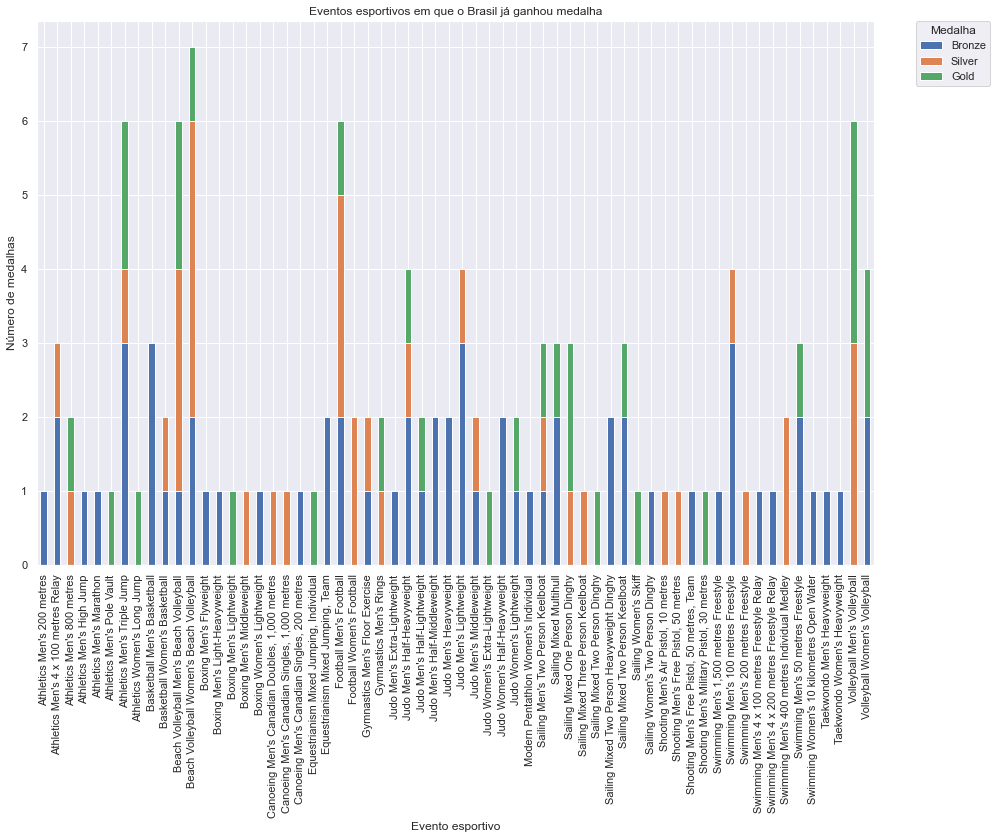

In [16]:
# Gráfico de barras empilhadas
plt.rcParams["figure.figsize"] = (15,10)
quadro_medal_event_bra.plot(kind='bar', stacked=True);
plt.title('Eventos esportivos em que o Brasil já ganhou medalha');
plt.xlabel('Evento esportivo');
plt.ylabel('Número de medalhas');
plt.legend(title='Medalha', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

Utilize um gráfico de distribuição (como um histograma, por exemplo) ilustrando a quantidade total de medalhas do Brasil por esporte.

In [17]:
# Total de medalhas por esporte e tipo de medalha
total_sport_dist = df_medal_bra.groupby(['Sport', 'Year', 'Medal'])['Event'].value_counts().reset_index(name='Qtde atletas')
total_sport_dist

Sport  Year   Medal                          Event  Qtde atletas
0     Athletics  1952  Bronze      Athletics Men's High Jump             1
1     Athletics  1952    Gold    Athletics Men's Triple Jump             1
2     Athletics  1956    Gold    Athletics Men's Triple Jump             1
3     Athletics  1968  Silver    Athletics Men's Triple Jump             1
4     Athletics  1972  Bronze    Athletics Men's Triple Jump             1
..          ...   ...     ...                            ...           ...
123  Volleyball  2008    Gold  Volleyball Women's Volleyball            12
124  Volleyball  2008  Silver    Volleyball Men's Volleyball            12
125  Volleyball  2012    Gold  Volleyball Women's Volleyball            12
126  Volleyball  2012  Silver    Volleyball Men's Volleyball            12
127  Volleyball  2016    Gold    Volleyball Men's Volleyball            12

[128 rows x 5 columns]

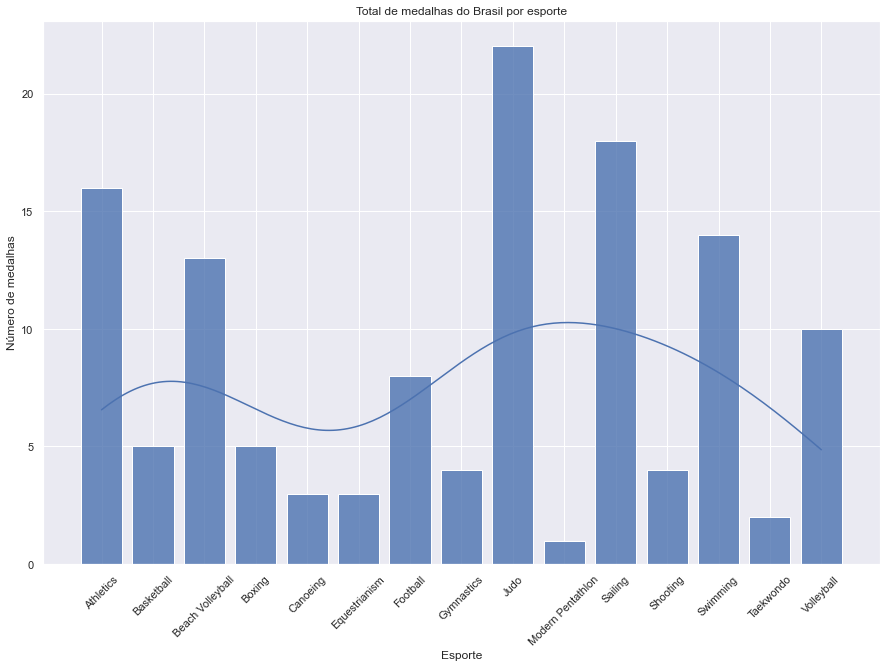

In [18]:
# Histograma com seaborn
sns.histplot(data=total_sport_dist, x="Sport", shrink=0.8, alpha=0.8, kde=True);
plt.title('Total de medalhas do Brasil por esporte');
plt.xlabel('Esporte');
plt.ylabel('Número de medalhas');
plt.xticks(rotation=45);

In [19]:
# # Gráfico de distribuição com seaborn
# sns.displot(data=total_sport_dist, x='Sport', kde=True);
# plt.title('Total de medalhas do Brasil por esporte');
# plt.xlabel('Esporte');
# plt.ylabel('Número de medalhas');
# plt.xticks(rotation=90);

In [20]:
# # Histograma com plotly
# fig_total_sport_hist = px.histogram(total_sport_dist, x='Sport')
# fig_total_sport_hist.update_layout(
#     title_text='Total de medalhas do Brasil por esporte',
#     xaxis_title_text='Esporte',
#     yaxis_title_text='Número de medalhas')

# fig_total_sport_hist.show()

Repita o procedimento acima, mas com medalhas de ouro.

In [21]:
# Total de medalhas de ouro por esporte
total_ouro_sport_dist = df_medal_bra.groupby(['Sport', 'Year', 'Medal'])['Event'].value_counts().reset_index(name='Qtde atletas')
total_ouro_sport_dist = total_ouro_sport_dist[total_ouro_sport_dist['Medal']=='Gold']
total_ouro_sport_dist

Sport  Year Medal                                      Event  \
1           Athletics  1952  Gold                Athletics Men's Triple Jump   
2           Athletics  1956  Gold                Athletics Men's Triple Jump   
7           Athletics  1984  Gold                 Athletics Men's 800 metres   
14          Athletics  2008  Gold                Athletics Women's Long Jump   
15          Athletics  2016  Gold                 Athletics Men's Pole Vault   
21   Beach Volleyball  1996  Gold  Beach Volleyball Women's Beach Volleyball   
26   Beach Volleyball  2004  Gold    Beach Volleyball Men's Beach Volleyball   
32   Beach Volleyball  2016  Gold    Beach Volleyball Men's Beach Volleyball   
38             Boxing  2016  Gold                   Boxing Men's Lightweight   
44      Equestrianism  2004  Gold    Equestrianism Mixed Jumping, Individual   
52           Football  2016  Gold                    Football Men's Football   
53         Gymnastics  2012  Gold                     Gymnastics Men's Rings   
61               Judo  1988  Gold                Judo Men's Half-Heavyweight   
62               Judo  1992  Gold                Judo Men's Half-Lightweight   
75               Judo  2012  Gold             Judo Women's Extra-Lightweight   
78               Judo  2016  Gold                   Judo Women's Lightweight   
82            Sailing  1980  Gold                    Sailing Mixed Multihull   
83            Sailing  1980  Gold            Sailing Mixed Two Person Dinghy   
88            Sailing  1996  Gold          Sailing Mixed Two Person Keelboat   
89            Sailing  1996  Gold            Sailing Mixed One Person Dinghy   
92            Sailing  2004  Gold          Sailing Men's Two Person Keelboat   
93            Sailing  2004  Gold            Sailing Mixed One Person Dinghy   
97            Sailing  2016  Gold                      Sailing Women's Skiff   
99           Shooting  1920  Gold  Shooting Men's Military Pistol, 30 metres   
112          Swimming  2008  Gold         Swimming Men's 50 metres Freestyle   
119        Volleyball  1992  Gold                Volleyball Men's Volleyball   
122        Volleyball  2004  Gold                Volleyball Men's Volleyball   
123        Volleyball  2008  Gold              Volleyball Women's Volleyball   
125        Volleyball  2012  Gold              Volleyball Women's Volleyball   
127        Volleyball  2016  Gold                Volleyball Men's Volleyball   

     Qtde atletas  
1               1  
2               1  
7               1  
14              1  
15              1  
21              2  
26              2  
32              2  
38              1  
44              1  
52             17  
53              1  
61              1  
62              1  
75              1  
78              1  
82              2  
83              2  
88              2  
89              1  
92              2  
93              1  
97              2  
99              1  
112             1  
119            12  
122            12  
123            12  
125            12  
127            12

In [22]:
# Histograma com plotly
fig_ouro_sport_hist = px.histogram(total_ouro_sport_dist, x='Sport',
                                   color='Medal',
                                   color_discrete_sequence=['gold'])
fig_ouro_sport_hist.update_layout(
    title_text='Total de medalhas de ouro do Brasil por esporte',
    xaxis_title_text='Esporte',
    yaxis_title_text='Número de medalhas')

fig_ouro_sport_hist.show()

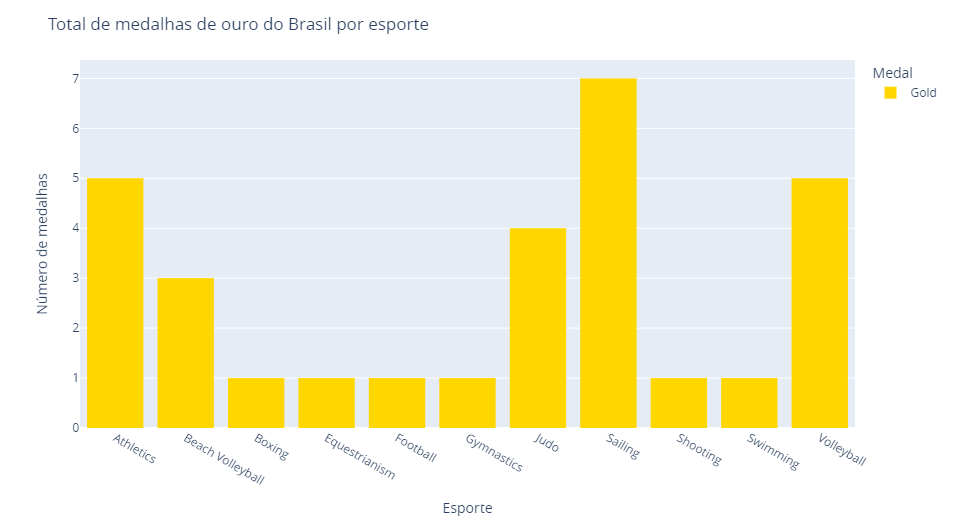

In [23]:
# # Histograma com seaborn
# sns.histplot(data=total_ouro_sport_dist, x="Sport", shrink=0.8, alpha=0.8, kde=True, color='gold');
# plt.title('Total de medalhas de ouro do Brasil por esporte');
# plt.xlabel('Esporte');
# plt.ylabel('Número de medalhas');

In [24]:
# # Gráfico de distribuição com seaborn
# sns.displot(data=total_ouro_sport_dist, x='Sport', kde=True, color='gold');
# plt.title('Total de medalhas de ouro do Brasil por esporte');
# plt.xlabel('Esporte');
# plt.ylabel('Número de medalhas');
# plt.xticks(rotation=90);

Agora faça um gráfico de setores (pizza) mostrando a distribuição de medalhas de ouro do Brasil por esporte.

In [25]:
# Gráfico de setores (pizza) com plotly
fig_ouro_sport_pie = px.pie(total_ouro_sport_dist, names='Sport')
fig_ouro_sport_pie.update_layout(
    title_text='Total de medalhas de ouro do Brasil por esporte')
fig_ouro_sport_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_ouro_sport_pie.show()

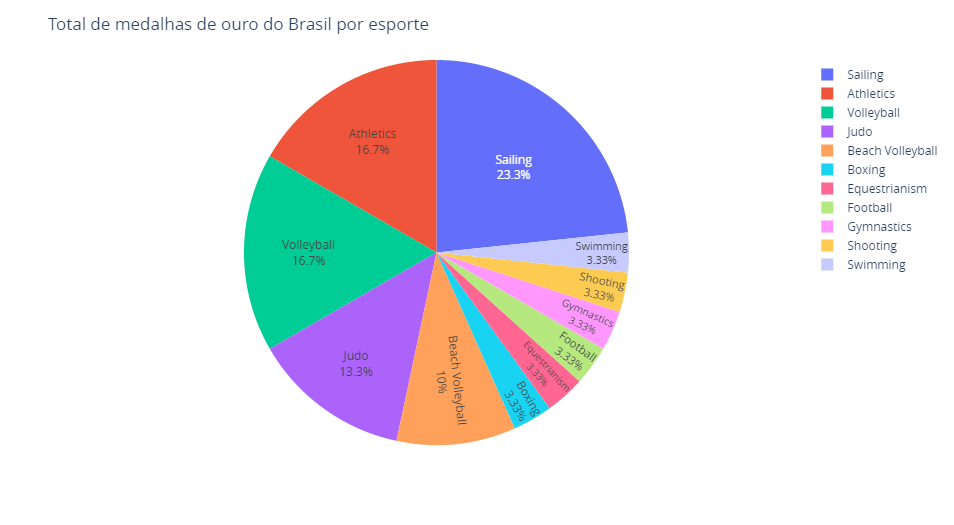

Para finalizar a história do Brasil, vamos ver a série temporal de medalhas brasileiras. Crie um gráfico de linhas contendo 3 linhas: ouro, prata e bronze. Coloque no eixo X a edição da olimpíada (em ordem cronológica) e no eixo Y o total de medalhas de cada tipo.

In [26]:
# DF apenas com medalhistas (mundo)
df_medal = df_athlete_events[~df_athlete_events['Medal'].isna()]

# DF com medalhistas nos jogos de verão
df_medal_verao = df_medal[df_medal['Season'] == 'Summer']

# DF com medalhistas nos jogos de verão por evento
df_medal_verao_event = df_medal_verao.groupby(['Year','NOC', 'Medal'])['Event'].value_counts().reset_index(name='Qtde atletas')

# Total de medalhas por tipo, ano e país
total_medalha_pais = df_medal_verao_event.groupby(['Year', 'NOC'])['Medal'].value_counts().reset_index(name='Total por medalha')

# Total de medalhas por ano e país
total_ano_pais = total_medalha_pais.groupby(['Year', 'NOC'])['Total por medalha'].sum().reset_index(name='Total medalhas (ano)')

# Total de medalhas de ouro, prata, bronze e total de medalhas, por ano e país
quadro_medal_ano_pais = pd.merge(total_medalha_pais, total_ano_pais, on=['Year', 'NOC'], how='outer').set_index(['Year', 'NOC', 'Medal'])
# pd.set_option('display.max_rows', quadro_medal_ano_pais.shape[0]) # Visualizar o quadro inteiro
quadro_medal_ano_pais.head()

Total por medalha  Total medalhas (ano)
Year NOC Medal                                          
1896 AUS Gold                    2                     3
         Bronze                  1                     3
     AUT Bronze                  2                     5
         Gold                    2                     5
         Silver                  1                     5

In [27]:
# Criando outro quadro de medalhas, sem transformar 'Year', 'NOC' e 'Medal' em index
quadro_medal_ano_pais_2 = pd.merge(total_medalha_pais, total_ano_pais, on=['Year', 'NOC'], how='outer')
quadro_medal_ano_pais_2

# Transformando o quadro anterior em outro DF, utilizando o pivot,
# para visualizar as medalhas de ouro, prata e bronze em colunas
df_rank = quadro_medal_ano_pais_2.pivot(index=['Year','NOC'], columns='Medal',values='Total por medalha')
df_rank = df_rank[['Bronze', 'Silver', 'Gold']]

# Ranqueando os países, em cada edição, por medalhas de ouro, depois prata, depois bronze
df_rank.sort_values(['Year', 'Gold', 'Silver', 'Bronze'], ascending=[True, False, False, False], inplace=True)
df_rank['Rank'] = ''
for i in df_rank.index.get_level_values('Year').unique():
    df_rank.loc[i, 'Rank'] = np.arange(len(df_rank.loc[i, :])) + 1
    
pd.set_option('display.max_rows', df_rank.shape[0]) # Visualizar o quadro inteiro
df_rank.head()

Medal     Bronze  Silver  Gold Rank
Year NOC                           
1896 USA     2.0     6.0  11.0    1
     GRE    17.0    17.0  10.0    2
     GER     2.0     5.0   7.0    3
     FRA     2.0     4.0   5.0    4
     GBR     3.0     3.0   3.0    5

In [28]:
# Ranking do Brasil
rank_bra = df_rank[df_rank.index.get_level_values('NOC').isin(['BRA'])]
rank_bra.head()

Medal     Bronze  Silver  Gold Rank
Year NOC                           
1920 BRA     1.0     1.0   1.0   15
1948 BRA     1.0     NaN   NaN   35
1952 BRA     2.0     NaN   1.0   24
1956 BRA     NaN     NaN   1.0   24
1960 BRA     2.0     NaN   NaN   39

In [29]:
rank_bra_2 = total_medalha_pais[total_medalha_pais['NOC']=='BRA']
rank_bra_2.head()

Year  NOC   Medal  Total por medalha
251  1920  BRA  Bronze                  1
252  1920  BRA    Gold                  1
253  1920  BRA  Silver                  1
591  1948  BRA  Bronze                  1
672  1952  BRA  Bronze                  2

In [30]:
rank_bra_3 = rank_bra.reset_index()
rank_bra_3.head()

Medal  Year  NOC  Bronze  Silver  Gold Rank
0      1920  BRA     1.0     1.0   1.0   15
1      1948  BRA     1.0     NaN   NaN   35
2      1952  BRA     2.0     NaN   1.0   24
3      1956  BRA     NaN     NaN   1.0   24
4      1960  BRA     2.0     NaN   NaN   39

In [31]:
# Gráfico de linhas com plotly
fig_medal_bra = go.Figure()

fig_medal_bra.add_trace(go.Scatter(x=rank_bra_3['Year'], y=rank_bra_3['Bronze'],
                                connectgaps=True, name='Bronze', line=dict(color='#CD7F32', width=15)))

fig_medal_bra.add_trace(go.Scatter(x=rank_bra_3['Year'], y=rank_bra_3['Silver'],
                                connectgaps=True, name = 'Silver', line=dict(color='silver', width=10)))

fig_medal_bra.add_trace(go.Scatter(x=rank_bra_3['Year'], y=rank_bra_3['Gold'],
                                connectgaps=True, name = 'Gold', line=dict(color='gold', width=5)))

fig_medal_bra.update_layout(
    title='Total de medalhas do Brasil por tipo e ano',
    xaxis_title='Ano',
    yaxis_title='Número de medalhas',
    legend_title='Medalha',
    font=dict(
        family='Arial',
        size=12,
        color='grey'
    )
)

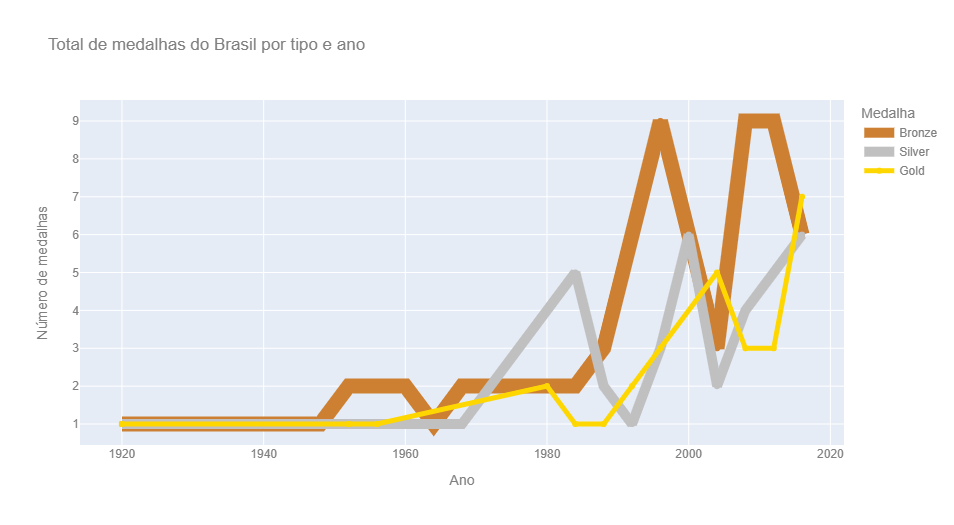

In [32]:
# # Gráfico de linhas
# rank_bra.groupby(['Year'])[['Bronze', 'Silver', 'Gold']].sum().plot(figsize=(16,8), linewidth=7, alpha=0.7);
# plt.title('Total de medalhas do Brasil por tipo e ano');
# plt.xlabel('Ano');
# plt.ylabel('Número de medalhas');

In [33]:
# # Gráfico de linhas com seaborn
# plt.figure(figsize=(15, 8));
# sns.lineplot(data=rank_bra_2, x='Year', y='Total por medalha', hue='Medal', palette='PuOr', linewidth=7);
# plt.title('Total de medalhas do Brasil por tipo e ano');
# plt.xlabel('Ano');
# plt.ylabel('Número de medalhas');

In [34]:
# # Gráfico de linhas com plotly
# fig_medal_bra_line = px.line(rank_bra_2, x='Year', y='Total por medalha', color='Medal', title='Quadro de medalhas do Brasil', markers=True)
# fig_medal_bra_line['data'][0]['line']['color']="#CD7F32"
# fig_medal_bra_line['data'][1]['line']['color']="gold"
# fig_medal_bra_line['data'][2]['line']['color']="silver"
# fig_medal_bra_line.show()

## 2. O mundo nos jogos de verão

Filtre o DataFrame original para conter apenas informações sobre os **medalhistas** de todos os países **nos jogos de verão**.



In [35]:
# DF com medalhistas nos jogos de verão
df_medal_verao.head()

ID                     Name Sex   Age  Height  Weight            Team  \
3    4     Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
37  15     Arvo Ossian Aaltonen   M  30.0     NaN     NaN         Finland   
38  15     Arvo Ossian Aaltonen   M  30.0     NaN     NaN         Finland   
41  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
42  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   

    NOC        Games  Year  Season       City       Sport  \
3   DEN  1900 Summer  1900  Summer      Paris  Tug-Of-War   
37  FIN  1920 Summer  1920  Summer  Antwerpen    Swimming   
38  FIN  1920 Summer  1920  Summer  Antwerpen    Swimming   
41  FIN  1948 Summer  1948  Summer     London  Gymnastics   
42  FIN  1948 Summer  1948  Summer     London  Gymnastics   

                                     Event   Medal  
3              Tug-Of-War Men's Tug-Of-War    Gold  
37  Swimming Men's 200 metres Breaststroke  Bronze  
38  Swimming Men's 400 metres Breaststroke  Bronze  
41  Gymnastics Men's Individual All-Around  Bronze  
42        Gymnastics Men's Team All-Around    Gold

Utilizando subplots, crie 2 boxplots ilustrando a quantidade de medalhas por atleta. Em um deles, considere todos os atletas. No segundo, experimente remover os *outliers*.

In [36]:
df_atletas_bra_sem_nomes_dupl = df_atletas_bra.groupby('Name').count()
df_atletas_bra_sem_nomes_dupl = df_atletas_bra_sem_nomes_dupl['Medal'].sort_values(ascending=False).reset_index(name='Total de medalhas')
df_atletas_bra_sem_nomes_dupl.head()

Name  Total de medalhas
0                      Robert Scheidt                  5
1                Torben Schmidt Grael                  5
2  Srgio "Escadinha" Dutra dos Santos                  4
3                Gustavo Frana Borges                  4
4     Dante Guimares Santos do Amaral                  3

In [37]:
total_medal_atlet_bra.sort_values(by='Total de medalhas', ascending=False).head()

Name  Total de medalhas
283                      Robert Scheidt                  5
332                Torben Schmidt Grael                  5
141                Gustavo Frana Borges                  4
316  Srgio "Escadinha" Dutra dos Santos                  4
286           Rodrigo "Rodrigo" Santana                  3

In [38]:
# Gráfico de boxplot com plotly (só medalhistas)

from plotly.subplots import make_subplots

fig_atlet_medal_bra = make_subplots(rows=1, cols=2,
                                    subplot_titles=('Medalhistas brasileiros', 
                                                    'Medalhistas brasileiros, sem outliers'))

fig_atlet_medal_bra.add_trace(go.Box(y=total_medal_atlet_bra['Total de medalhas'], 
                                     name = 'Medalhistas brasileiros'), row=1, col=1)
fig_atlet_medal_bra.add_trace(go.Box(y=total_medal_atlet_bra['Total de medalhas'], 
                                     name = 'Medalhistas brasileiros', boxpoints=False), row=1, col=2)

fig_atlet_medal_bra.update_yaxes(title_text='Total de medalhas', row=1, col=1)

fig_atlet_medal_bra.update_layout(showlegend=False)

fig_atlet_medal_bra.show()

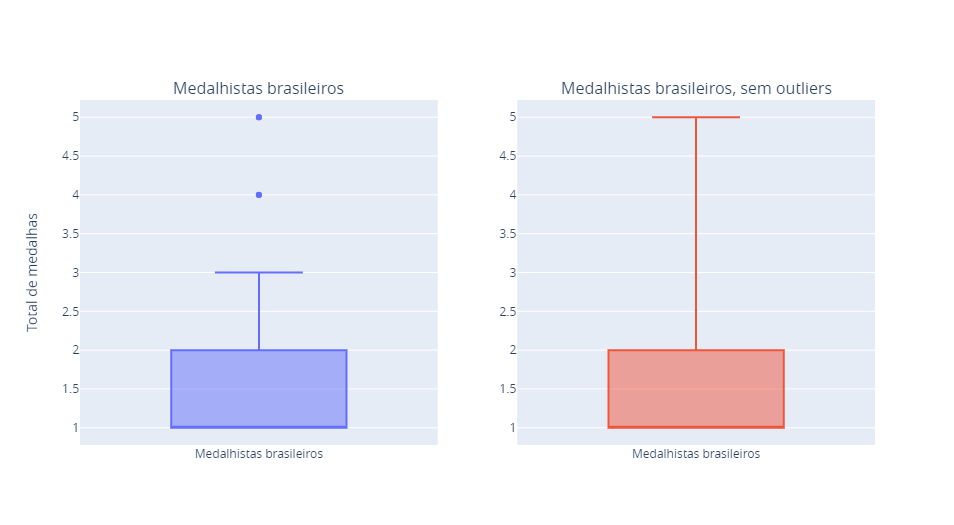

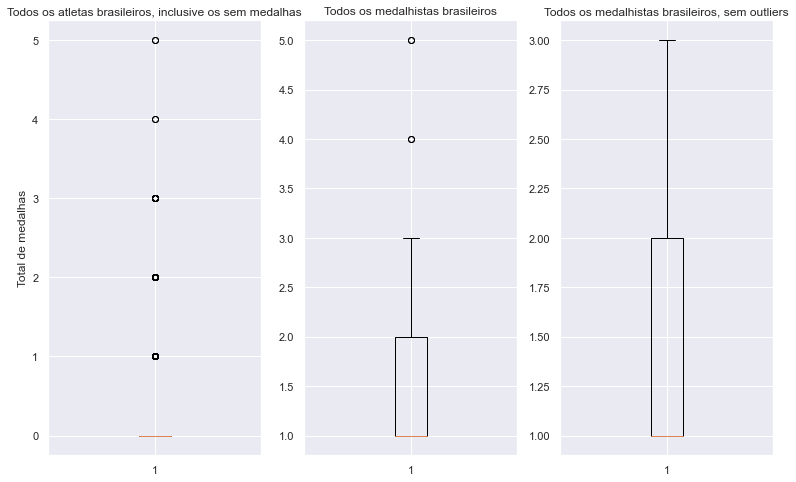

In [39]:
# Gráfico de boxplot (todos os atletas e só medalhistas)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13,8))

axes[0].boxplot(df_atletas_bra_sem_nomes_dupl['Total de medalhas'])
axes[0].set_ylabel('Total de medalhas')
axes[0].set_title('Todos os atletas brasileiros, inclusive os sem medalhas');

axes[1].boxplot(total_medal_atlet_bra['Total de medalhas'])
axes[1].set_title('Todos os medalhistas brasileiros');

axes[2].boxplot(total_medal_atlet_bra['Total de medalhas'], showfliers=False)
axes[2].set_title('Todos os medalhistas brasileiros, sem outliers');

Descubra o total de medalhas de ouro de cada país (lembrando-se da restrição dos eventos esportivos, para não contabilizar múltiplas medalhas em esportes de equipe!).

Agora pegue os 10 países com mais medalhas e crie uma categoria "Outros" para o restante dos países. Exiba um gráfico de pizza mostrando a distribuição de medalhas de ouro entre essas 11 "equipes".

In [40]:
# Total de medalhas de ouro de cada país
df_rank_ouro = df_rank.reset_index()
df_rank_ouro = df_rank_ouro.groupby('NOC')['Gold'].sum().sort_values(ascending=False).reset_index()

# Os 10 países com mais medalhas de ouro
df_ouro_top_10 = df_rank_ouro.head(10)
df_ouro_top_10

# Restante dos países
df_ouro_outros = df_rank_ouro.iloc[10:]
df_ouro_outros['Gold'].sum()
df_ouro_outros = {'NOC': 'Outros', 'Gold': 2137}

# Os 10 países com mais medalhas de ouro e o restante dos países
df_ouro = df_ouro_top_10.append(df_ouro_outros, ignore_index = True)
df_ouro

NOC    Gold
0      USA  1035.0
1      URS   394.0
2      GBR   278.0
3      FRA   233.0
4      GER   233.0
5      CHN   227.0
6      ITA   219.0
7      HUN   178.0
8      RUS   153.0
9      GDR   153.0
10  Outros  2137.0

In [41]:
# Gráfico de setores (pizza) com plotly
fig_ouro_pais = px.pie(df_ouro, values='Gold', names='NOC')
fig_ouro_pais.update_layout(
    title_text='Países com mais medalhas de ouro')
fig_ouro_pais.update_traces(textposition='inside', textinfo='percent+label')
fig_ouro_pais.show()

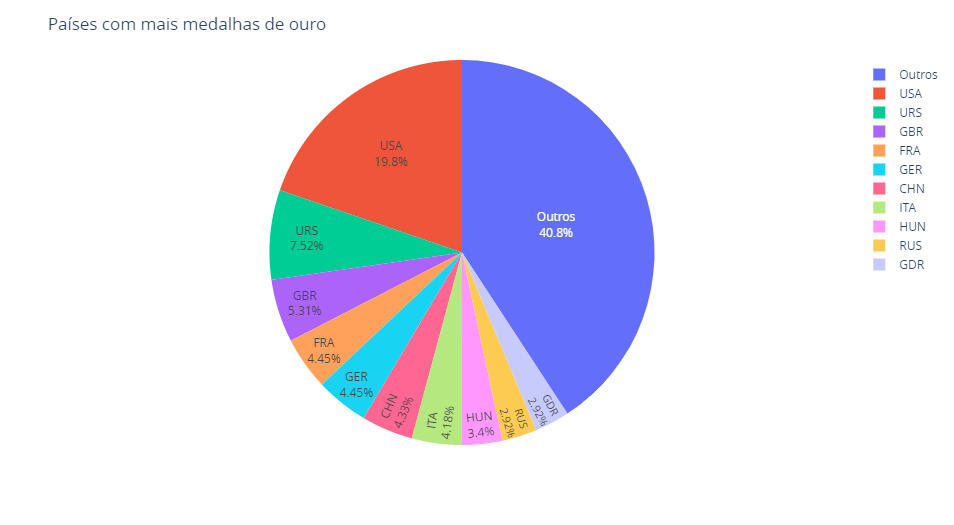

Repita o procedimento acima, mas mostrando o total de medalhas ao invés de apenas medalhas de ouro.

In [42]:
# Total de medalhas de ouro, prata, bronze e total de medalhas, por ano e país
quadro_medal_ano_pais

# Total de medalhas de cada país
df_total_medal_pais = quadro_medal_ano_pais.reset_index()
df_total_medal_pais = df_total_medal_pais.groupby('NOC')['Total por medalha'].sum().sort_values(ascending=False).reset_index()
df_total_medal_pais

# Os 10 países com mais medalhas
df_top_10 = df_total_medal_pais.head(10)
df_top_10.columns = ['NOC', 'Total de medalhas']
df_top_10

# Restante dos países
df_outros = df_total_medal_pais.iloc[10:]
df_outros
df_outros['Total por medalha'].sum()
df_outros = {'NOC': 'Outros', 'Total de medalhas': 7392}

# Os 10 países com mais medalhas e o restante dos países
df_medal_pais = df_top_10.append(df_outros, ignore_index = True)
df_medal_pais

NOC  Total de medalhas
0      USA               2544
1      URS               1005
2      GBR                892
3      GER                776
4      FRA                770
5      ITA                608
6      CHN                542
7      SWE                513
8      AUS                506
9      HUN                504
10  Outros               7392

In [43]:
# Gráfico de setores (pizza) com plotly
fig_medal_pais = px.pie(df_medal_pais, values='Total de medalhas', names='NOC')
fig_medal_pais.update_layout(
    title_text='Países com mais medalhas')
fig_medal_pais.update_traces(textposition='inside', textinfo='percent+label')
fig_medal_pais.show()

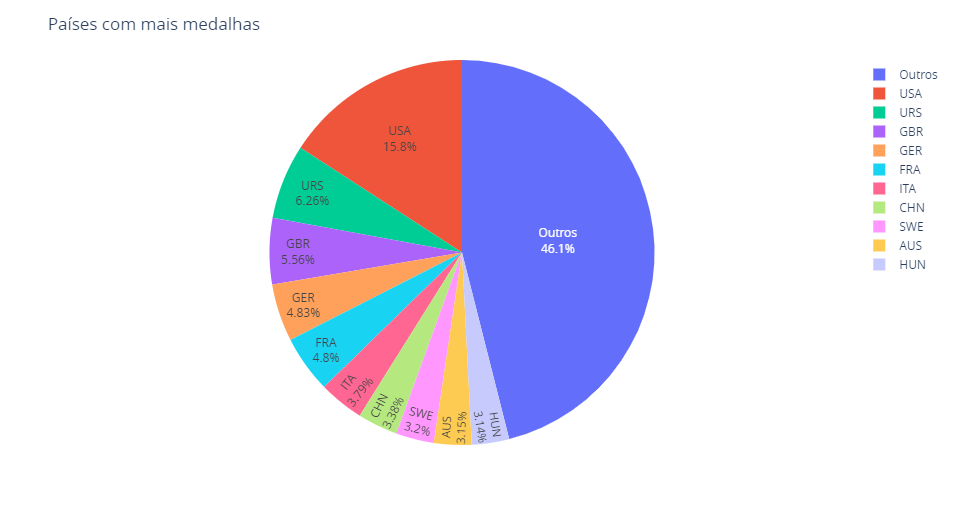

Crie um gráfico de barras empilhadas, com cada país das categorias acima no eixo X, total de medalhas no eixo Y, e barras empilhadas representando as medalhas de ouro, prata e bronze de cada país.

In [44]:
df_rank_2 = df_rank.reset_index()
df_rank_2 = df_rank_2.groupby(['NOC'])[['Bronze','Silver','Gold']].sum().reset_index()
df_rank_2

quadro_medal_ano_pais_3 = quadro_medal_ano_pais_2.groupby(['NOC'])[['Total por medalha']].sum().reset_index()
quadro_medal_ano_pais_3

df_pais_total_medal = pd.merge(df_rank_2, quadro_medal_ano_pais_3, on='NOC')
df_pais_total_medal.rename(columns={'Total por medalha': 'Total de medalhas'}, inplace=True)
df_pais_total_medal.sort_values(by='Total de medalhas', ascending=False, inplace=True)
df_pais_total_medal

df_top_10_pais_total_medal = df_pais_total_medal.head(10)
df_top_10_pais_total_medal

NOC  Bronze  Silver    Gold  Total de medalhas
139  USA   707.0   802.0  1035.0               2544
137  URS   294.0   317.0   394.0               1005
46   GBR   298.0   316.0   278.0                892
49   GER   282.0   261.0   233.0                776
43   FRA   282.0   255.0   233.0                770
67   ITA   198.0   191.0   219.0                608
22   CHN   153.0   162.0   227.0                542
121  SWE   188.0   175.0   150.0                513
6    AUS   192.0   167.0   147.0                506
57   HUN   172.0   154.0   178.0                504

In [45]:
# Gráfico de barras empilhadas com plotly

fig_medal_tipo_pais = px.bar(df_top_10_pais_total_medal, x='NOC', y=['Bronze', 'Silver', 'Gold'], 
             color_discrete_sequence=['#CD7F32', 'silver', 'gold'], 
       title='Países com mais medalhas', 
       labels=dict(NOC='País', value='Número de medalhas', variable='Medalha'))
fig_medal_tipo_pais.update_layout(width=900, height=700, bargap=0.5)

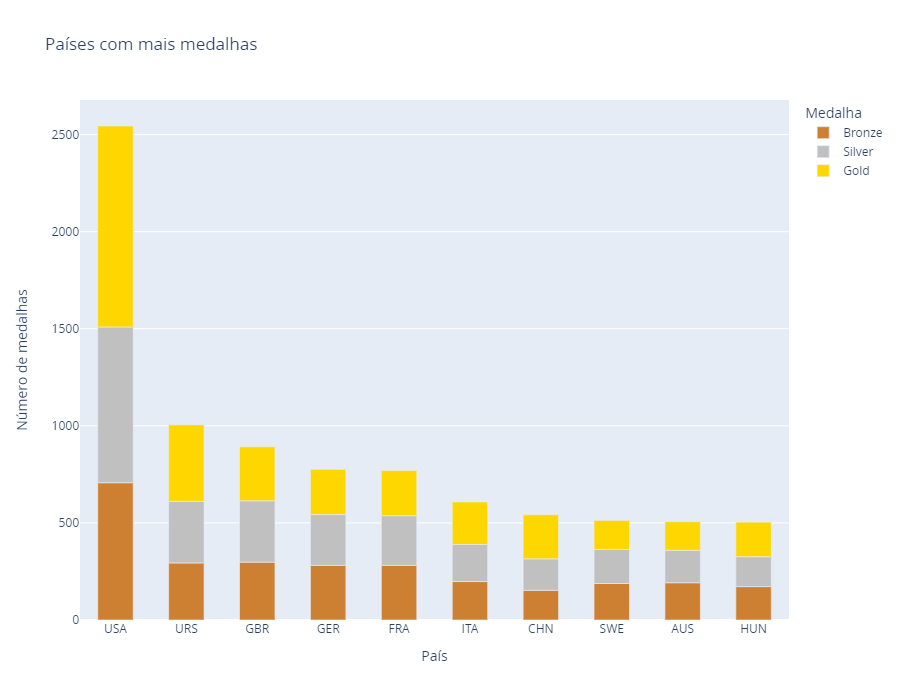

Crie um gráfico de distribuição (por exemplo, um histograma) mostrando a quantidade total de medalhas por país.

In [46]:
# Histograma com plotly
fig_total_medal_pais = px.histogram(df_total_medal_pais, x='NOC', y='Total por medalha', color='NOC')
fig_total_medal_pais.update_layout(
    title_text='Total de medalhas por país',
    xaxis_title_text='País',
    yaxis_title_text='Número de medalhas')

fig_total_medal_pais.show()

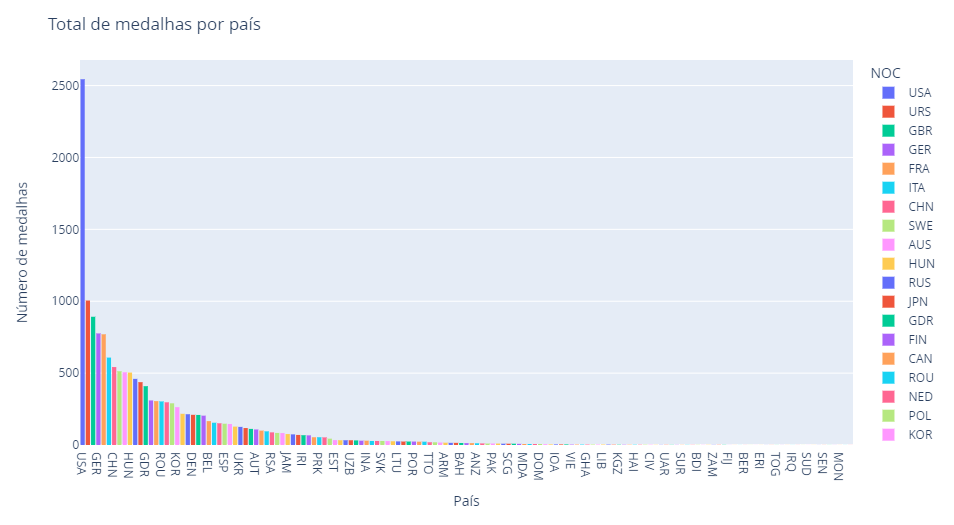

In [47]:
# Histograma com plotly (só para os 10 países com mais medalhas)
fig_total_medal_pais_10 = px.histogram(df_total_medal_pais.head(10), x='NOC', y='Total por medalha', color='NOC')
fig_total_medal_pais_10.update_layout(
    title_text='Total de medalhas por país',
    xaxis_title_text='País',
    yaxis_title_text='Número de medalhas')

fig_total_medal_pais_10.show()

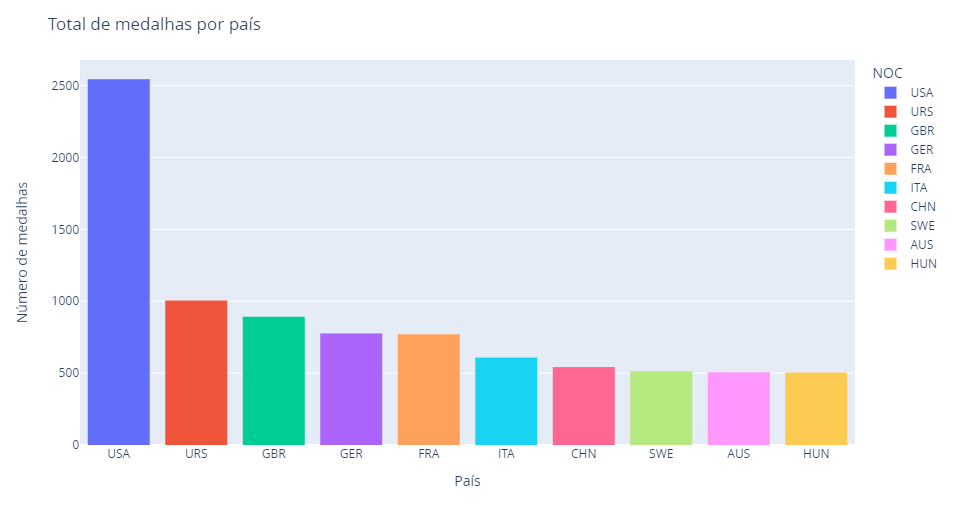

**Desafio bônus:** Crie uma visualização da quantidade de medalhas de ouro e outra para quantidade total de medalhas por país, ambas utilizando mapas. Utilize o tipo de mapa que achar mais adequado.

## 3. Brasil vs Mundo

Faça um gráfico de barras comparando os maiores medalhistas brasileiros com os maiores medalhistas do mundo em suas respectivas categorias.

Represente o esporte no eixo X, a quantidade de medalhas no eixo Y, coloque barras lado-a-lado representando os diferentes atletas de uma mesma modalidade e empilhe as medalhas de ouro, prata e bronze de cada atleta.

In [48]:
# Total de medalhas por país, esporte e nome
total_medal_esp_nome = df_medal.groupby(['NOC', 'Sport', 'Name'])['Medal'].count().sort_values(ascending=False).reset_index()

# Os maiores medalhistas do mundo
total_medal_esp_nome.head()

# Total de medalhas por país, esporte, nome e tipo de medalha
total_medal_tipo_esp_nome = df_medal.groupby(['NOC', 'Sport', 'Name', 'Medal'])['Medal'].count().reset_index(name='Número de medalhas')
total_medal_tipo_esp_nome = total_medal_tipo_esp_nome.sort_values(by='Número de medalhas', ascending=False)
total_medal_tipo_esp_nome.head()

# Os maiores medalhistas do Brasil
# Escolhendo 3 categorias diferentes: Sailing, Swimming, Volleyball
total_medal_esp_nome[total_medal_esp_nome['NOC']=='BRA'].head(4)

# Os maiores medalhistas do mundo (Sailing)
total_medal_esp_nome[total_medal_esp_nome['Sport']=='Sailing'].head()

# Os maiores medalhistas do mundo (Volleyball)
total_medal_esp_nome[total_medal_esp_nome['Sport']=='Volleyball'].head() # Empate
# Escolhendo @ maior medalhista do mundo no Volleyball
total_medal_tipo_esp_nome[(total_medal_tipo_esp_nome['Name']=='Samuele Papi')]
# Escolhendo @ maior medalhista do mundo no Volleyball
total_medal_tipo_esp_nome[(total_medal_tipo_esp_nome['Name']=='Inna Valeryevna Ryskal')]

NOC       Sport                    Name   Medal  Número de medalhas
28528  URS  Volleyball  Inna Valeryevna Ryskal  Silver                   2
28527  URS  Volleyball  Inna Valeryevna Ryskal    Gold                   2

In [226]:
# Mundo
# Total de medalhas por atleta, esporte e tipo de medalha
t1 = df_medal.groupby(['Name', 'Sport'])['Medal'].value_counts().reset_index(name='Total por medalha')
t1

# Total de medalhas por atleta
t2 = t1.groupby(['Name', 'Sport'])['Total por medalha'].sum().reset_index(name='Total de medalhas')
t2

# Total de medalhas de ouro, prata, bronze e total por atleta
q = pd.merge(t1, t2, on=['Name', 'Sport'])
q

# Os maiores medalhistas
t3 = q.sort_values(['Total de medalhas', 'Sport'], ascending=[False, True])

# Sailing, Swimming, Volleyball (categorias dos maiores medalhistas brasileiros)
t3 = t3[(t3['Sport']=='Sailing') | (t3['Sport']=='Swimming') | (t3['Sport']=='Volleyball')]

t3.set_index(['Sport', 'Name', 'Medal'], inplace=True)
t3 = t3.unstack(level=2)
t3.drop('Total de medalhas', axis=1, inplace=True)
t3.columns = ['Bronze', 'Gold', 'Silver']
t3 = t3[['Bronze', 'Silver', 'Gold']]
t3

# Pegando os maiores medalhistas nas categorias dos melhores medalhistas brasileiros
t3_2 = t3.reset_index()
t3_2 = t3_2[(t3_2['Name']=='Michael Fred Phelps, II') | 
        (t3_2['Name']=='Charles Benedict "Ben" Ainslie') | 
        (t3_2['Name']=='Inna Valeryevna Ryskal')]
t3_2.set_index(['Sport', 'Name'], inplace=True)
t3_2

Bronze  Silver  Gold
Sport      Name                                                
Sailing    Charles Benedict "Ben" Ainslie     NaN     1.0   4.0
Swimming   Michael Fred Phelps, II            2.0     3.0  23.0
Volleyball Inna Valeryevna Ryskal             NaN     2.0   2.0

In [50]:
# # Gráfico de barras empilhadas com plotly

# fig_t3_2 = px.bar(t3_2, x='Name', y=['Bronze', 'Silver', 'Gold'], color_discrete_sequence=['#CD7F32', 'silver', 'gold'], 
#        title='Maiores medalhistas nas categorias dos melhores medalhistas brasileiros', 
#        labels=dict(Name='Nome', value='Número de medalhas', variable='Medalha'))
# fig_t3_2.update_layout(width=800, height=600, bargap=0.5)

In [227]:
# Brasil
# Total de medalhas por atleta, esporte e tipo de medalha
t1_bra = df_medal_bra.groupby(['Name', 'Sport'])['Medal'].value_counts().reset_index(name='Total por medalha')
t1_bra

# Total de medalhas por atleta
t2_bra = t1_bra.groupby(['Name', 'Sport'])['Total por medalha'].sum().reset_index(name='Total de medalhas')
t2_bra

# Total de medalhas de ouro, prata, bronze e total por atleta
q_bra = pd.merge(t1_bra, t2_bra, on=['Name', 'Sport'])
q_bra

# Os maiores medalhistas brasileiros
t3_bra = q_bra.sort_values(['Total de medalhas', 'Sport'], ascending=[False, True])
t3_bra

# Pegando as categorias: Sailing, Swimming, Volleyball
t3_bra = t3_bra[(t3_bra['Sport']=='Sailing') | (t3_bra['Sport']=='Swimming') | (t3_bra['Sport']=='Volleyball')]

# Pegando os maiores medalhistas brasileiros
t3_bra = t3_bra.set_index(['Sport', 'Name', 'Medal']).head(10)
t3_bra = t3_bra.unstack(level=2)
t3_bra.drop('Total de medalhas', axis=1, inplace=True)
t3_bra.columns = ['Bronze', 'Gold', 'Silver']
t3_bra = t3_bra[['Bronze', 'Silver', 'Gold']]
t3_bra

# Removendo Torben Schmidt Grael para ficar apenas com 3 medalhistas
t3_bra = t3_bra.drop(t3_bra.iloc[1].name)
t3_bra

t3_bra_2 = t3_bra.reset_index()
t3_bra_2.set_index(['Sport', 'Name'], inplace=True)
t3_bra_2

Bronze  Silver  Gold
Sport      Name                                                    
Sailing    Robert Scheidt                         1.0     2.0   2.0
Swimming   Gustavo Frana Borges                   2.0     2.0   NaN
Volleyball Srgio "Escadinha" Dutra dos Santos     NaN     2.0   2.0

In [52]:
# # Gráfico de barras empilhadas com plotly

# t3_bra_2 = t3_bra.reset_index()

# fig_t3_bra = px.bar(t3_bra_2, x='Name', y=['Bronze', 'Silver', 'Gold'], color_discrete_sequence=['#CD7F32', 'silver', 'gold'], 
#        title='Maiores medalhistas brasileiros', 
#        labels=dict(Name='Nome', value='Número de medalhas', variable='Medalha'))
# fig_t3_bra.update_layout(width=800, height=600, bargap=0.5)

In [234]:
# Concatenando os DFs com os maiores medalhistas do Brasil e do mundo nas mesmas categorias

conc_maior_medal = pd.concat([t3_2, t3_bra_2], axis=0)
conc_maior_medal = conc_maior_medal.groupby(['Sport', 'Name'])[['Bronze', 'Silver', 'Gold']].sum()
conc_maior_medal

Bronze  Silver  Gold
Sport      Name                                                    
Sailing    Charles Benedict "Ben" Ainslie         0.0     1.0   4.0
           Robert Scheidt                         1.0     2.0   2.0
Swimming   Gustavo Frana Borges                   2.0     2.0   0.0
           Michael Fred Phelps, II                2.0     3.0  23.0
Volleyball Inna Valeryevna Ryskal                 0.0     2.0   2.0
           Srgio "Escadinha" Dutra dos Santos     0.0     2.0   2.0

In [54]:
# df_bronze = conc_maior_medal.drop(['Silver', 'Gold'], axis=1)
# df_bronze

In [55]:
# df_silver = conc_maior_medal.drop(['Bronze', 'Gold'], axis=1)
# df_silver

In [56]:
# df_gold = conc_maior_medal.drop(['Bronze', 'Silver'], axis=1)
# df_gold

In [57]:
# # Criando novo DF
# df_novo = pd.DataFrame()

# df_novo['Name'] = df_bronze['Name']
# df_novo['Sport'] = df_bronze['Sport']
# df_novo['Bronze'] = df_bronze['Bronze']
# df_novo['Silver'] = df_silver['Silver']
# df_novo['Gold'] = df_gold['Gold']

# df_novo

In [58]:
# px.bar(df_novo, x='Name', y=['Bronze','Silver', 'Gold'])

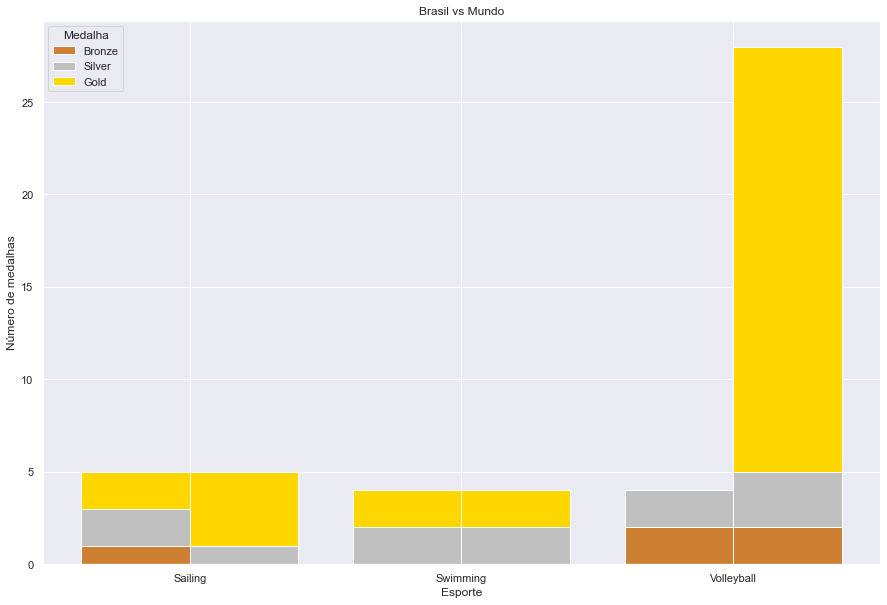

In [171]:
# Usaremos o plt.bar 2 vezes: em uma passaremos a lista com o número de medalhas dos atletas brasileiros, e na
# outra, o número de medalhas dos atletas de outros países

# Teremos que gerar:
#     - uma lista de valores para o eixo X do primeiro gráfico;
#     - outra lista, um pouco deslocada em relação a essa, para o segundo gráfico.
    
# "fórmula" pronta para gerar essas listas:

#     [t*x + l*n for x in range(d)]

# t é o número total de séries que temos;
# l é a largura de cada barrinha (o padrão é 0.8);
# n é a série cujo eixo X estamos gerando

# plt.bar([t*x + l*1 for x in range(d)], brasil)
# plt.bar([t*x + l*2 for x in range(d)], mundo)

# Em que brasil e mundo são as listas com as quantidades de medalhas por categoria

# Agora precisamos fazer com que as "marquinhas" no eixo X apareçam bem no meio das barras, 
# e o texto de cada marquinha seja o nome do esporte.
# Para isso usaremos uma outra fórmula (com as mesmas variáveis definidas anteriormente) 
# e a função plt.xticks, que recebe a lista de valores do eixo X, em que as marquinhas devem ser exibidas, 
# e um parâmetro opcional labels que recebe uma lista com os textos a serem exibidos:
    
# ticks = [t*x + l*t - l*t/2 + l/t for x in range(d)]
# plt.xticks(ticks, labels=sport)

bronze_bra = [1, 0, 2]
silver_bra = [2, 2, 2]
gold_bra = [2, 2, 0]

bronze_mund = [0, 0, 2]
silver_mund = [1, 2, 3]
gold_mund = [4, 2, 23]

# A lista de valores de "x" para cada série é dada por: 
    
#     [t*x + l*n for x in range(d)]

# Em que:
# n: número da série atual;
# t: número total de séries;
# d: número de pontos;
# l: largura de cada barra (o padrão é 0.8)
    
t = 2 # temos 2 séries: brasil e mundo
d = 3 # cada série tem 3 pontos (no caso, 3 esportes)
l = 0.8

# plt.bar([t*x + l*1 for x in range(d)], brasil)
# plt.bar([t*x + l*2 for x in range(d)], mundo)

# Agora queremos que a "marquinha" fique bem no centro de cada bloco de barras...
# Mas não queremos que apareçam números, e sim o nome dos esportes, por isso usaremos o parâmetro "labels"


# plt.xticks(ticks, labels=sport, rotation=15)
# plt.legend(['Brasileiros', 'Mundo']) # exibindo a legenda indicando as categorias
# plt.title('Maiores medalhistas do Brasil e do mundo nas mesmas categorias')
# plt.xlabel('Esporte')
# plt.ylabel('Número de medalhas')
# plt.tight_layout()

# O plt.bar possui o parâmetro opcional bottom. Ele recebe uma lista de valores indicando a partir de qual altura as barras 
# devem ser desenhadas. Podemos mandar desenhar uma categoria (por exemplo, a categoria "medal"), 
# e em seguida, mandamos desenhar a outra categoria passando como bottom as alturas da categoria anterior.

# Brasil
# primeiro desenhamos o bronze:
plt.bar([t*x + l*1 for x in range(d)], bronze_bra, color='#CD7F32')
# agora desenhamos o silver acima do bronze:
plt.bar([t*x + l*1 for x in range(d)], silver_bra, bottom = np.array(bronze_bra), color='silver')
# agora desenhamos o gold acima do silver:
plt.bar([t*x + l*1 for x in range(d)], gold_bra, bottom = np.array(silver_bra) + np.array(bronze_bra), color='gold')

# Mundo
# primeiro desenhamos o bronze:
plt.bar([t*x + l*2 for x in range(d)], bronze_mund, color='#CD7F32')
# agora desenhamos o silver acima do bronze:
plt.bar([t*x + l*2 for x in range(d)], silver_mund, bottom = np.array(bronze_mund), color='silver')
# agora desenhamos o gold acima do silver:
plt.bar([t*x + l*2 for x in range(d)], gold_mund, bottom = np.array(silver_mund) + np.array(bronze_mund), color='gold')


ticks = [t*x + l*t - l*t/2 + l/t for x in range(d)]

plt.xticks(ticks, labels=conc_maior_medal.index.get_level_values('Sport').unique())
# plt.xticks(ticks, labels=athletes)
plt.legend(conc_maior_medal.columns, title='Medalha')
plt.title('Brasil vs Mundo')
plt.xlabel('Esporte')
plt.ylabel('Número de medalhas');

In [ ]:
sport = ['Sailing', 'Volleyball', 'Swimming']
athletes = ['Robert Scheidt / Charles Benedict "Ben" Ainslie', 
            'Srgio "Escadinha" Dutra dos Santos / Inna Valeryevna Ryskal', 
           'Gustavo Frana Borges / Michael Fred Phelps, II']
# brasil = [5, 4, 4]
# mundo = [5, 4, 28]

bronze_bra = [1, 0, 2]
silver_bra = [2, 2, 2]
gold_bra = [2, 2, 0]

bronze_mund = [0, 0, 2]
silver_mund = [1, 2, 3]
gold_mund = [4, 2, 23]

    
t = 2 # temos 2 séries: brasil e mundo
d = 3 # cada série tem 3 pontos (no caso, 3 esportes)
l = 0.8

# plt.bar([t*x + l*1 for x in range(d)], brasil)
# plt.bar([t*x + l*2 for x in range(d)], mundo)

# Agora queremos que a "marquinha" fique bem no centro de cada bloco de barras...
# Mas não queremos que apareçam números, e sim o nome dos esportes, por isso usaremos o parâmetro "labels"


# plt.xticks(ticks, labels=sport, rotation=15)
# plt.legend(['Brasileiros', 'Mundo']) # exibindo a legenda indicando as categorias
# plt.title('Maiores medalhistas do Brasil e do mundo nas mesmas categorias')
# plt.xlabel('Esporte')
# plt.ylabel('Número de medalhas')
# plt.tight_layout()

# O plt.bar possui o parâmetro opcional bottom. Ele recebe uma lista de valores indicando a partir de qual altura as barras 
# devem ser desenhadas. Podemos mandar desenhar uma categoria (por exemplo, a categoria "medal"), 
# e em seguida, mandamos desenhar a outra categoria passando como bottom as alturas da categoria anterior.

# Brasil
# primeiro desenhamos o bronze:
plt.bar([t*x + l*1 for x in range(d)], bronze_bra, color='#CD7F32')
# agora desenhamos o silver acima do bronze:
plt.bar([t*x + l*1 for x in range(d)], silver_bra, bottom = np.array(bronze_bra), color='silver')
# agora desenhamos o gold acima do silver:
plt.bar([t*x + l*1 for x in range(d)], gold_bra, bottom = np.array(silver_bra) + np.array(bronze_bra), color='gold')

# Mundo
# primeiro desenhamos o bronze:
plt.bar([t*x + l*2 for x in range(d)], bronze_mund, color='#CD7F32')
# agora desenhamos o silver acima do bronze:
plt.bar([t*x + l*2 for x in range(d)], silver_mund, bottom = np.array(bronze_mund), color='silver')
# agora desenhamos o gold acima do silver:
plt.bar([t*x + l*2 for x in range(d)], gold_mund, bottom = np.array(silver_mund) + np.array(bronze_mund), color='gold')


ticks = [t*x + l*t - l*t/2 + l/t for x in range(d)]

plt.xticks(ticks, labels=sport)
# plt.xticks(ticks, labels=athletes)
plt.legend(['Bronze', 'Silver', 'Gold'], title='Medalha')
plt.title('Brasil vs Mundo')
plt.xlabel('Esporte')
plt.ylabel('Número de medalhas');

In [60]:
# Gráfico de barras com plotly (não consegui empilhar as medalhas)

fig_conc = px.bar(conc_maior_medal, x='Sport', y=['Bronze', 'Silver', 'Gold'], color='Name', barmode='group',
                  
       title='Maiores medalhistas do Brasil e do mundo nas mesmas categorias', 
       labels=dict(Sport='Esporte', value='Número de medalhas'))
fig_conc.update_layout(width=800, height=600, bargap=0.5)

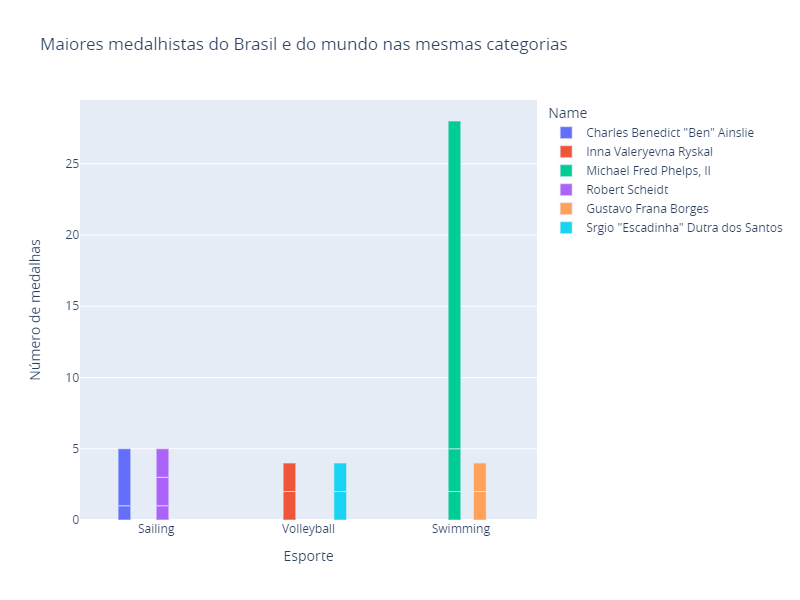

In [61]:
conc_maior_medal_2 = conc_maior_medal.set_index(['Sport', 'Name'])
conc_maior_medal_2

Bronze  Silver  Gold
Sport      Name                                                    
Sailing    Charles Benedict "Ben" Ainslie         NaN     1.0   4.0
Volleyball Inna Valeryevna Ryskal                 NaN     2.0   2.0
Swimming   Michael Fred Phelps, II                2.0     3.0  23.0
Sailing    Robert Scheidt                         1.0     2.0   2.0
Swimming   Gustavo Frana Borges                   2.0     2.0   NaN
Volleyball Srgio "Escadinha" Dutra dos Santos     NaN     2.0   2.0

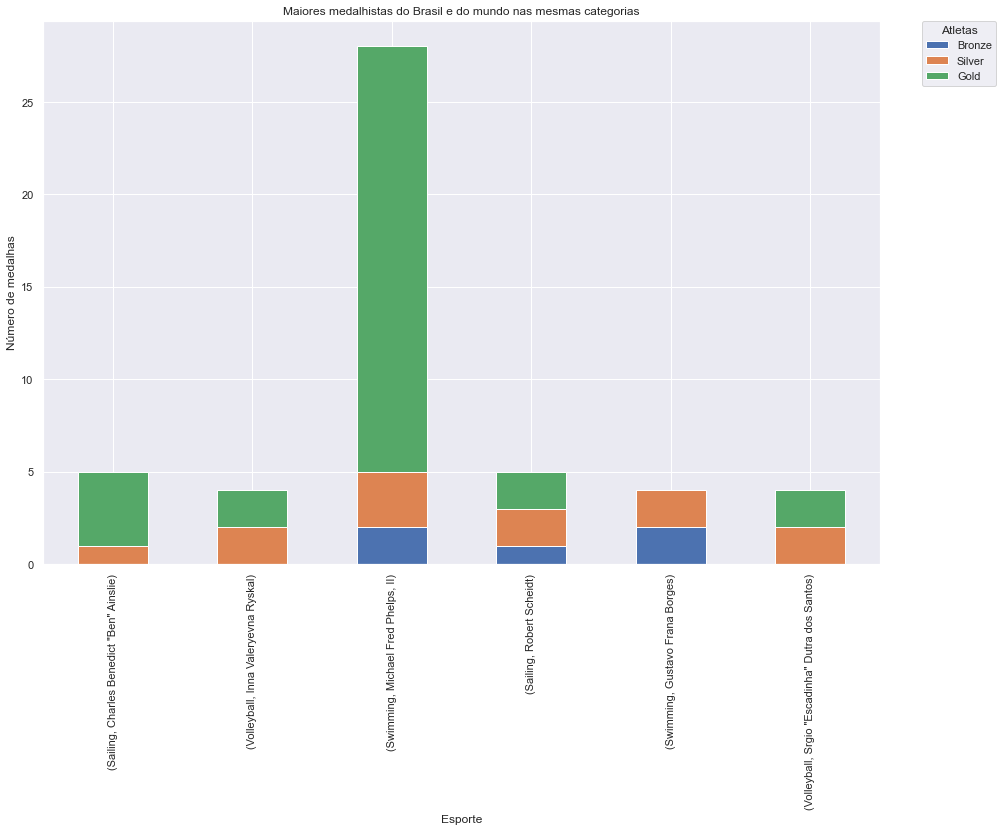

In [62]:
# Gráfico de barras empilhadas (não consegui fazer barras lado a lado)
plt.rcParams["figure.figsize"] = (15,10)
conc_maior_medal_2.plot(kind='bar', stacked=True);
plt.title('Maiores medalhistas do Brasil e do mundo nas mesmas categorias');
plt.xlabel('Esporte');
plt.ylabel('Número de medalhas');
plt.legend(title='Atletas', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

Repita o procedimento acima, mas ao invés de atletas, considere o(s) esporte(s) onde o Brasil mais possui medalha comparando-os com o país com maior quantidade de medalhas naquele esporte.

In [63]:
# Total de medalhas por esporte e tipo de medalha
total_medal_tipo_sport = df_medal.groupby(['NOC', 'Sport', 'Year', 'Medal'])['Event'].value_counts().reset_index(name='Qtde atletas')
total_medal_tipo_sport = total_medal_tipo_sport.groupby(['NOC', 'Sport', 'Year', 'Medal'])['Event'].count().reset_index()
total_medal_tipo_sport = total_medal_tipo_sport.groupby(['NOC', 'Sport', 'Medal'])['Event'].sum().reset_index(name='Total por medalha')
total_medal_tipo_sport

# Pegando os esportes em que o Brasil possui mais medalhas
total_medal_tipo_sport = total_medal_tipo_sport[(total_medal_tipo_sport['Sport']=='Judo') | 
        (total_medal_tipo_sport['Sport']=='Sailing') | 
        (total_medal_tipo_sport['Sport']=='Athletics')]

total_medal_tipo_sport.set_index(['NOC', 'Sport', 'Medal'], inplace=True)
total_medal_tipo_sport = total_medal_tipo_sport.unstack(level=2)
total_medal_tipo_sport.columns = ['Bronze', 'Gold', 'Silver']
total_medal_tipo_sport = total_medal_tipo_sport[['Bronze', 'Silver', 'Gold']]
total_medal_tipo_sport

Bronze  Silver   Gold
NOC Sport                           
AHO Sailing       NaN     1.0    NaN
ALG Athletics     2.0     3.0    4.0
    Judo          1.0     1.0    NaN
ANZ Athletics     1.0     NaN    NaN
ARG Athletics     NaN     3.0    2.0
    Judo          1.0     NaN    1.0
    Sailing       5.0     4.0    1.0
AUS Athletics    28.0    27.0   21.0
    Judo          2.0     NaN    NaN
    Sailing       8.0     8.0   11.0
AUT Athletics     4.0     2.0    1.0
    Judo          1.0     2.0    2.0
    Sailing       1.0     4.0    3.0
AZE Judo          1.0     2.0    1.0
BAH Athletics     5.0     2.0    5.0
    Sailing       1.0     NaN    1.0
BAR Athletics     1.0     NaN    NaN
BDI Athletics     NaN     1.0    1.0
BEL Athletics     2.0     7.0    4.0
    Judo          9.0     1.0    2.0
    Sailing       3.0     4.0    2.0
BLR Athletics     7.0     6.0    4.0
    Judo          1.0     NaN    1.0
BOH Athletics     NaN     1.0    NaN
BOT Athletics     NaN     1.0    NaN
BRA Athletics     8.0     3.0    5.0
    Judo         15.0     3.0    4.0
    Sailing       8.0     3.0    7.0
BRN Athletics     1.0     1.0    1.0
BUL Athletics     6.0     8.0    5.0
    Judo          2.0     1.0    NaN
CAN Athletics    31.0    16.0   15.0
    Judo          3.0     2.0    NaN
    Sailing       6.0     3.0    NaN
CHI Athletics     NaN     2.0    NaN
CHN Athletics    14.0     5.0    8.0
    Judo         11.0     3.0    8.0
    Sailing       1.0     3.0    2.0
CIV Athletics     NaN     1.0    NaN
CMR Athletics     NaN     NaN    2.0
COL Athletics     1.0     1.0    1.0
    Judo          1.0     1.0    NaN
CRO Athletics     1.0     1.0    3.0
    Sailing       NaN     1.0    1.0
CUB Athletics    16.0    14.0   10.0
    Judo         16.0    14.0    6.0
    Sailing       NaN     1.0    NaN
CYP Sailing       NaN     1.0    NaN
CZE Athletics     6.0     1.0    5.0
    Judo          NaN     NaN    1.0
    Sailing       NaN     1.0    NaN
DEN Athletics     3.0     4.0    NaN
    Sailing       9.0     9.0   12.0
DJI Athletics     1.0     NaN    NaN
DOM Athletics     NaN     1.0    2.0
ECU Athletics     NaN     1.0    1.0
EGY Judo          1.0     1.0    NaN
ERI Athletics     1.0     NaN    NaN
ESP Athletics     6.0     5.0    3.0
    Judo          2.0     1.0    3.0
    Sailing       1.0     5.0   13.0
EST Athletics     3.0     1.0    2.0
    Judo          3.0     NaN    NaN
    Sailing       2.0     NaN    NaN
ETH Athletics    22.0     9.0   22.0
EUN Athletics     3.0    11.0    7.0
    Judo          2.0     NaN    2.0
FIN Athletics    32.0    35.0   49.0
    Sailing       7.0     2.0    2.0
FRA Athletics    29.0    27.0   14.0
    Judo         25.0    10.0   14.0
    Sailing      15.0     9.0   15.0
FRG Athletics    17.0    14.0   12.0
    Judo          3.0     4.0    1.0
    Sailing       3.0     2.0    2.0
GBR Athletics    68.0    85.0   59.0
    Judo         11.0     8.0    NaN
    Sailing      11.0    20.0   28.0
GDR Athletics    35.0    36.0   38.0
    Judo          6.0     2.0    1.0
    Sailing       2.0     2.0    2.0
GEO Judo          3.0     2.0    3.0
GER Athletics    47.0    43.0   22.0
    Judo         14.0     3.0    3.0
    Sailing       6.0     5.0    4.0
GRE Athletics    14.0    14.0    8.0
    Judo          1.0     NaN    1.0
    Sailing       3.0     2.0    3.0
GRN Athletics     NaN     1.0    1.0
GUA Athletics     NaN     1.0    NaN
HAI Athletics     NaN     1.0    NaN
HKG Sailing       NaN     NaN    1.0
HUN Athletics    19.0    15.0   11.0
    Judo          5.0     3.0    1.0
    Sailing       1.0     NaN    NaN
IND Athletics     NaN     2.0    NaN
IRI Athletics     NaN     1.0    NaN
IRL Athletics     NaN     2.0    4.0
    Sailing       NaN     2.0    NaN
ISL Athletics     1.0     1.0    NaN
    Judo          1.0     NaN    NaN
ISR Judo          4.0     1.0    NaN
    Sailing       2.0     NaN    1.0
ISV Sailing       NaN     1.0    NaN
ITA Athletics    26.0    15.0   19.0
    Judo          7.0     4.0    4.0
    Sailing       8

Para finalizar, repita os gráficos que você gerou com os 10 países com mais medalhas, mas remova o Brasil da categoria "Outros" e mostre-o também no gráfico.

In [64]:
# Pegando o Brasil
df_ouro_top_10_mais_bra = df_rank_ouro[df_rank_ouro['NOC']=='BRA']
df_ouro_top_10_mais_bra

# Os 10 países com mais medalhas de ouro
df_ouro_top_10 = df_rank_ouro.head(10)
df_ouro_top_10

# Concatenando o Brasil com os top 10 em medalhas de ouro
conc_top_10_ouro_mais_bra = pd.concat([df_ouro_top_10, df_ouro_top_10_mais_bra], axis=0)
conc_top_10_ouro_mais_bra.columns = ['NOC', 'Total de medalhas de ouro']
conc_top_10_ouro_mais_bra = conc_top_10_ouro_mais_bra.reset_index(drop=True)
conc_top_10_ouro_mais_bra

# Restante dos países
df_ouro_outros_sem_bra = df_rank_ouro.iloc[11:]
df_ouro_outros_sem_bra[df_ouro_outros_sem_bra['NOC']=='BRA']
df_ouro_outros_sem_bra = df_ouro_outros_sem_bra[~(df_ouro_outros_sem_bra['NOC']=='BRA')]
df_ouro_outros_sem_bra[df_ouro_outros_sem_bra['NOC']=='BRA']
df_ouro_outros_sem_bra['Gold'].sum()
df_ouro_outros_sem_bra.columns = ['NOC', 'Total de medalhas de ouro']
df_ouro_outros_sem_bra = {'NOC': 'Outros', 'Total de medalhas de ouro': 1957}

# Brasil, os 10 países com mais medalhas de ouro e o restante dos países
df_ouro_mais_bra = conc_top_10_ouro_mais_bra.append(df_ouro_outros_sem_bra, ignore_index = True)
df_ouro_mais_bra

NOC  Total de medalhas de ouro
0      USA                     1035.0
1      URS                      394.0
2      GBR                      278.0
3      FRA                      233.0
4      GER                      233.0
5      CHN                      227.0
6      ITA                      219.0
7      HUN                      178.0
8      RUS                      153.0
9      GDR                      153.0
10     BRA                       30.0
11  Outros                     1957.0

In [65]:
# Gráfico de setores (pizza) com plotly
fig_ouro_pais = px.pie(df_ouro_mais_bra, values='Total de medalhas de ouro', names='NOC')
fig_ouro_pais.update_layout(
    title_text='Brasil e os países com mais medalhas de ouro')
fig_ouro_pais.update_traces(textposition='inside', textinfo='percent+label')
fig_ouro_pais.show()

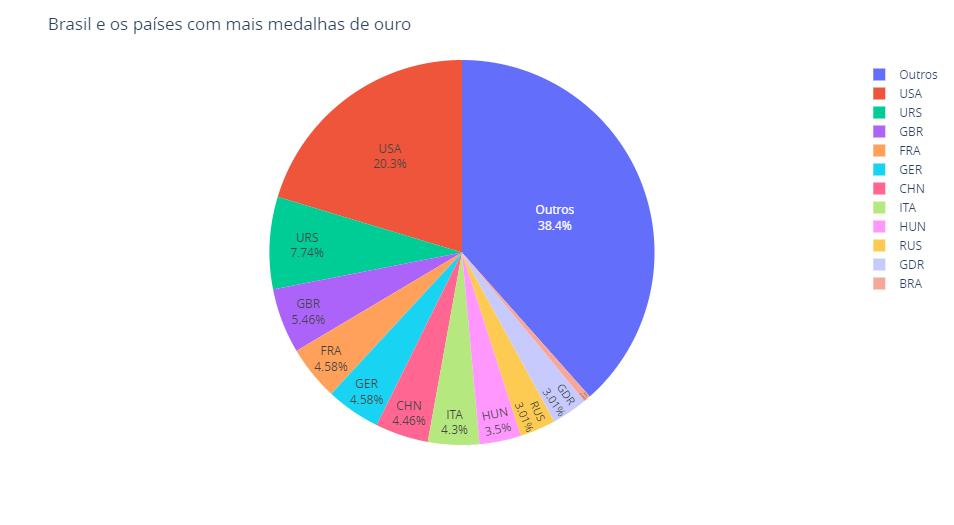

In [66]:
# Pegando o Brasil
df_top_10_mais_bra = df_total_medal_pais[df_total_medal_pais['NOC']=='BRA']
df_top_10_mais_bra

# Os 10 países com mais medalhas
df_top_10 = df_total_medal_pais.head(10)
df_top_10

# Concatenando o Brasil com os top 10
conc_top_10_mais_bra = pd.concat([df_top_10, df_top_10_mais_bra], axis=0)
conc_top_10_mais_bra.columns = ['NOC', 'Total de medalhas']
conc_top_10_mais_bra = conc_top_10_mais_bra.reset_index(drop=True)
conc_top_10_mais_bra

# Restante dos países
df_outros_sem_bra = df_total_medal_pais.iloc[11:]
df_outros_sem_bra[df_outros_sem_bra['NOC']=='BRA']
df_outros_sem_bra = df_outros_sem_bra[~(df_outros_sem_bra['NOC']=='BRA')]
df_outros_sem_bra[df_outros_sem_bra['NOC']=='BRA']
df_outros_sem_bra['Total por medalha'].sum()
df_outros_sem_bra.columns = ['NOC', 'Total de medalhas']
df_outros_sem_bra = {'NOC': 'Outros', 'Total de medalhas': 6804}
df_outros_sem_bra

# Brasil, os 10 países com mais medalhas e o restante dos países
df_medal_pais_mais_bra = conc_top_10_mais_bra.append(df_outros_sem_bra, ignore_index = True)
df_medal_pais_mais_bra

NOC  Total de medalhas
0      USA               2544
1      URS               1005
2      GBR                892
3      GER                776
4      FRA                770
5      ITA                608
6      CHN                542
7      SWE                513
8      AUS                506
9      HUN                504
10     BRA                128
11  Outros               6804

In [67]:
# Gráfico de setores (pizza) com plotly
fig_medal_pais = px.pie(df_medal_pais_mais_bra, values='Total de medalhas', names='NOC')
fig_medal_pais.update_layout(
    title_text='Brasil e os países com mais medalhas')
fig_medal_pais.update_traces(textposition='inside', textinfo='percent+label')
fig_medal_pais.show()

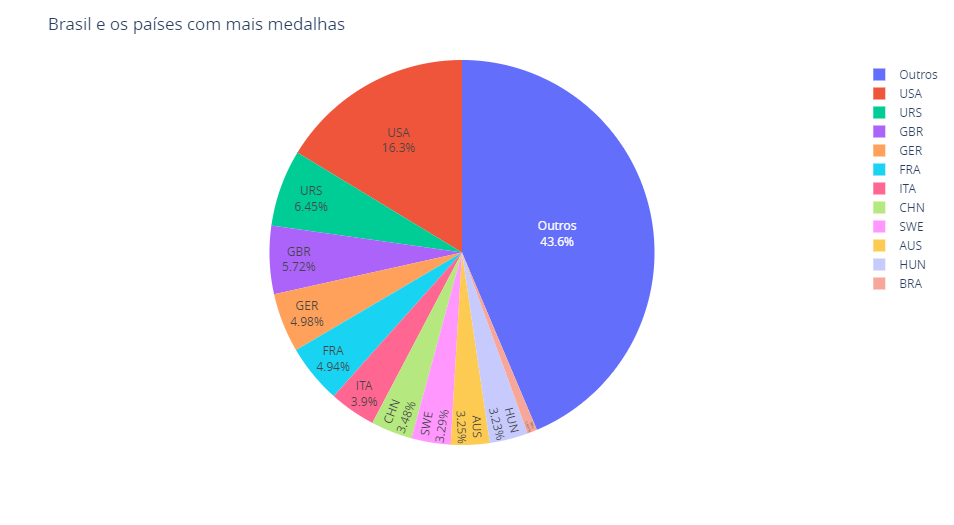